In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import MeanShift,estimate_bandwidth
from itertools import product
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Customer data.csv')
print('There are {} rows and {} columns in our dataset'.format(data.shape[0],data.shape[1]))

There are 10695 rows and 11 columns in our dataset


In [3]:
data.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [4]:
data.drop(columns=['CustomerID','Category','Segmentation'],axis=1,inplace=True)

In [5]:
data.head()

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          10695 non-null  object 
 1   Married         10505 non-null  object 
 2   Age             10695 non-null  int64  
 3   Graduated       10593 non-null  object 
 4   Profession      10533 non-null  object 
 5   WorkExperience  9597 non-null   float64
 6   SpendingScore   10695 non-null  object 
 7   FamilySize      10247 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 668.6+ KB


In [7]:
data.describe()

,Age,WorkExperience,FamilySize
count,10695.000000,9597.000000,10247.000000
mean,43.511828,2.619777,2.844052
std,16.774158,3.390790,1.536427
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [8]:
data.apply(pd.isnull).sum()

Gender               0
Married            190
Age                  0
Graduated          102
Profession         162
WorkExperience    1098
SpendingScore        0
FamilySize         448
dtype: int64

In [9]:
data.duplicated().sum()

2019

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(8676, 8)

In [12]:
data.groupby('Gender').mean(numeric_only=True)

,Age,WorkExperience,FamilySize
Gender,,,
Female,42.792062,3.159551,2.797036
Male,44.645182,2.727732,2.952317


In [13]:
data.groupby('Married').mean(numeric_only=True)

,Age,WorkExperience,FamilySize
Married,,,
No,33.156501,3.456782,2.995211
Yes,50.820468,2.581135,2.806797


In [14]:
data.groupby('Graduated').mean(numeric_only=True)

,Age,WorkExperience,FamilySize
Graduated,,,
No,39.839150,2.756925,3.303382
Yes,46.210676,3.022981,2.619161


In [15]:
data.groupby('Profession').mean(numeric_only=True)

,Age,WorkExperience,FamilySize
Profession,,,
Artist,46.215710,3.067342,2.597435
Doctor,37.764361,2.742600,2.886308
Engineer,41.659649,2.750973,3.040293
Entertainment,43.179464,2.907830,2.791549
Executive,50.509434,2.464463,3.494012
Healthcare,28.342150,3.252672,3.659633
Homemaker,38.270968,6.369231,2.280000
Lawyer,74.288431,1.440678,2.018613
Marketing,37.531579,2.648649,3.122905


In [16]:
data.groupby('SpendingScore').mean(numeric_only=True)

,Age,WorkExperience,FamilySize
SpendingScore,,,
Average,46.936993,2.756742,3.162847
High,56.066265,2.394943,3.090557
Low,39.430611,3.123488,2.708138


In [17]:
data.columns

Index(['Gender', 'Married', 'Age', 'Graduated', 'Profession', 'WorkExperience',
       'SpendingScore', 'FamilySize'],
      dtype='object')

In [18]:
categorical_columns,numerical_columns=[],[]
for column in data.columns:
    if data[column].dtype=='object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [19]:
categorical_columns

['Gender', 'Married', 'Graduated', 'Profession', 'SpendingScore']

In [20]:
numerical_columns

['Age', 'WorkExperience', 'FamilySize']

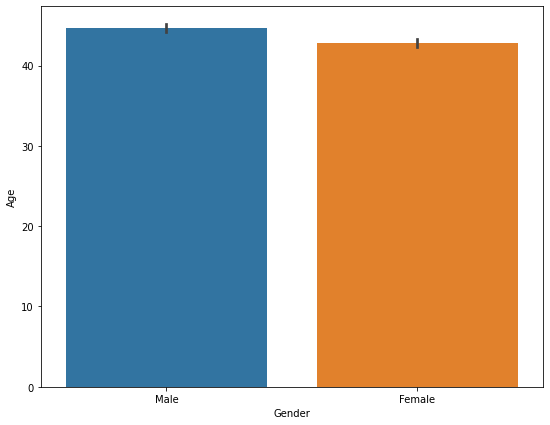

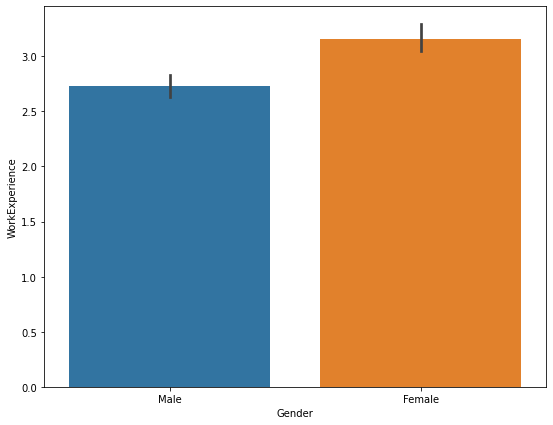

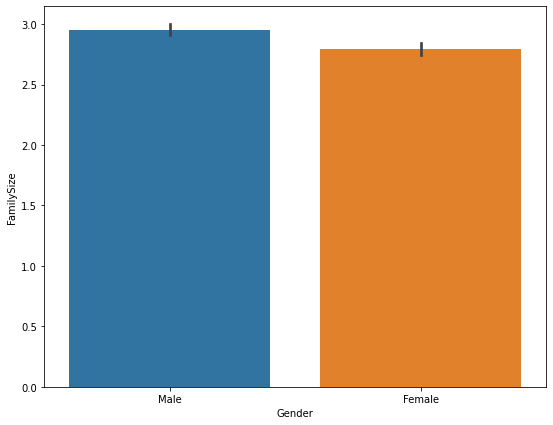

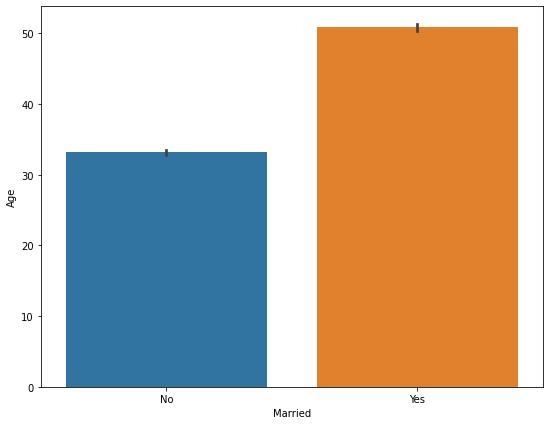

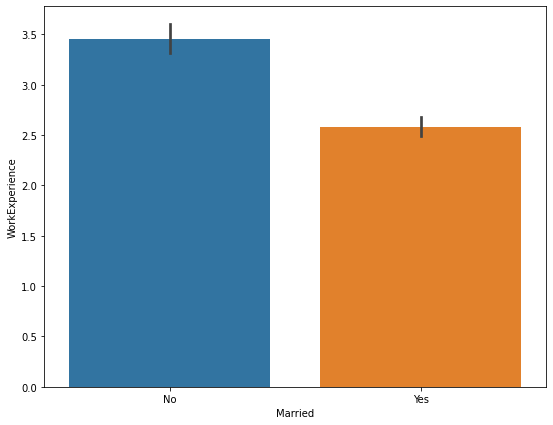

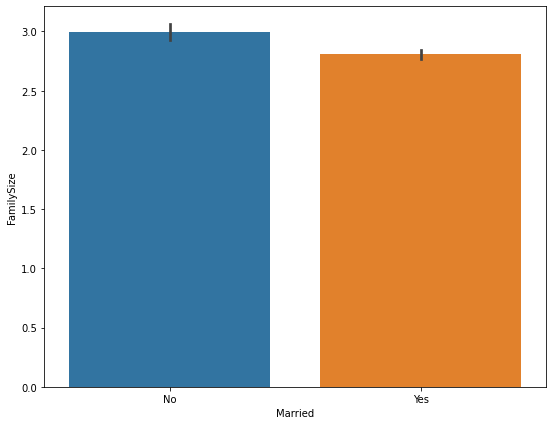

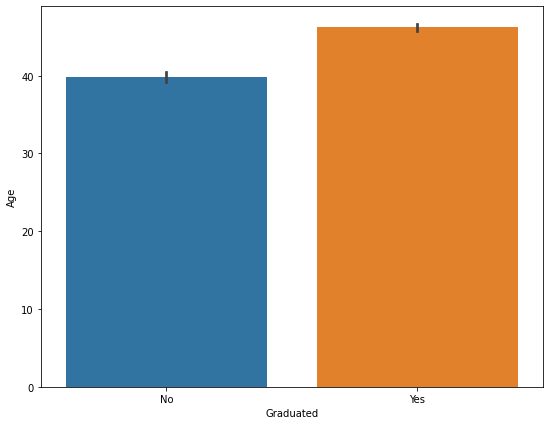

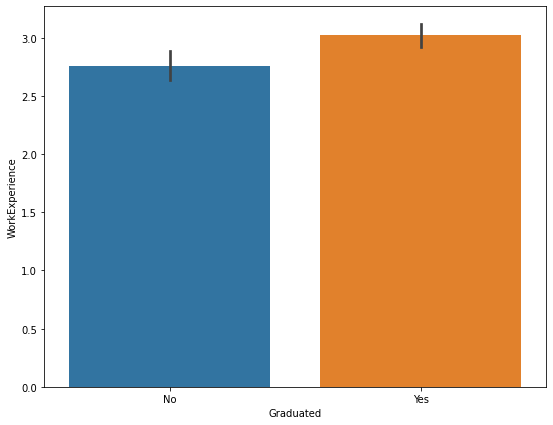

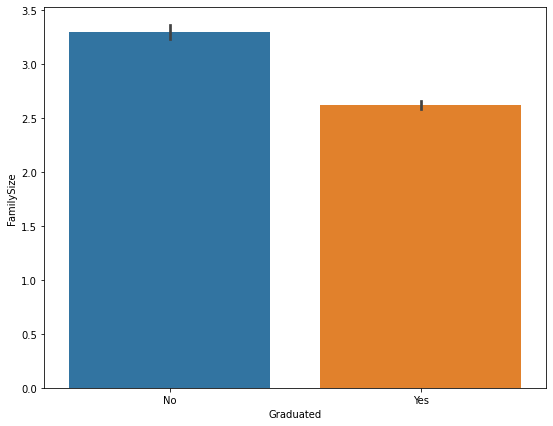

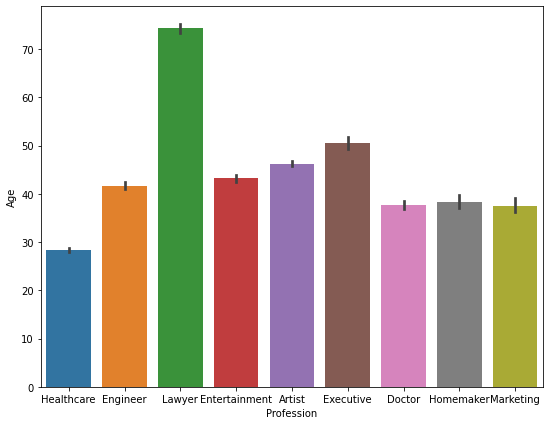

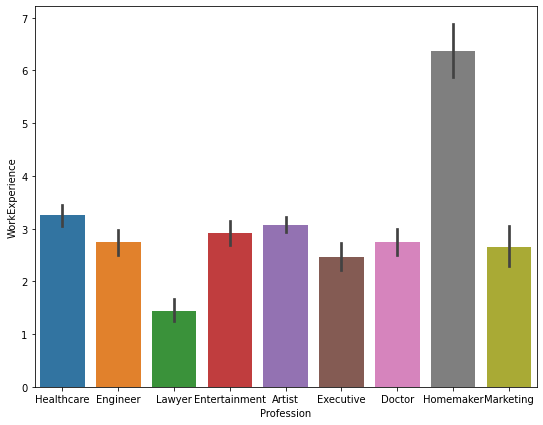

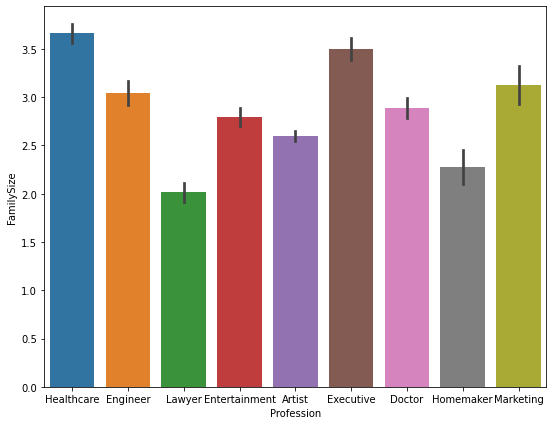

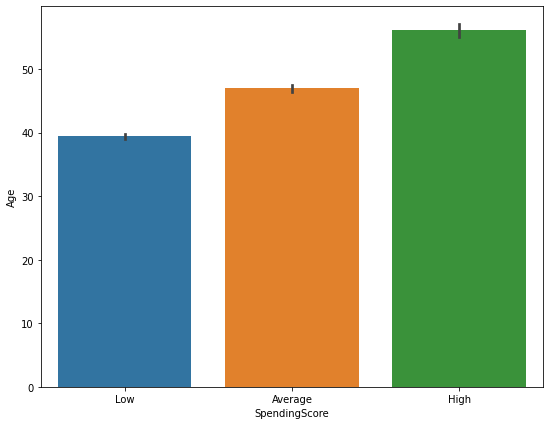

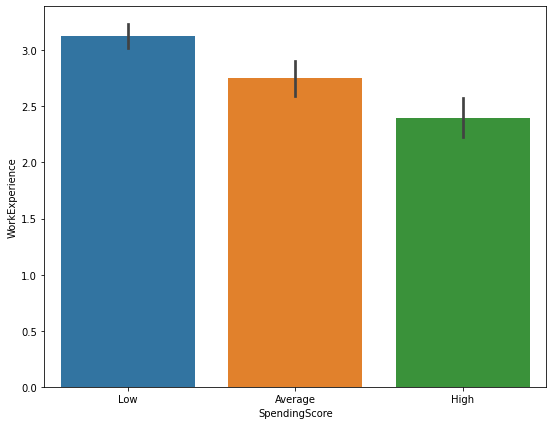

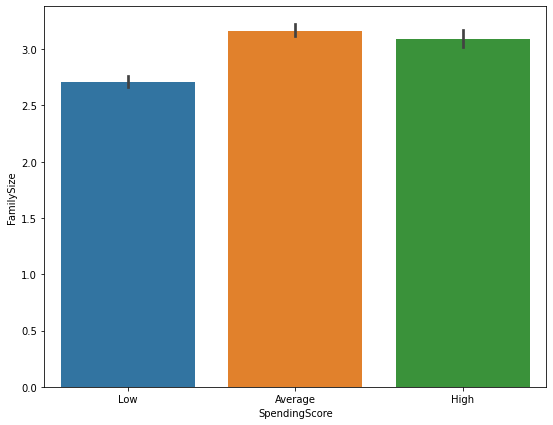

In [21]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=data,x=i,y=j)
        plt.show()

In [22]:
cols1=['Married','Graduated','Profession','SpendingScore']

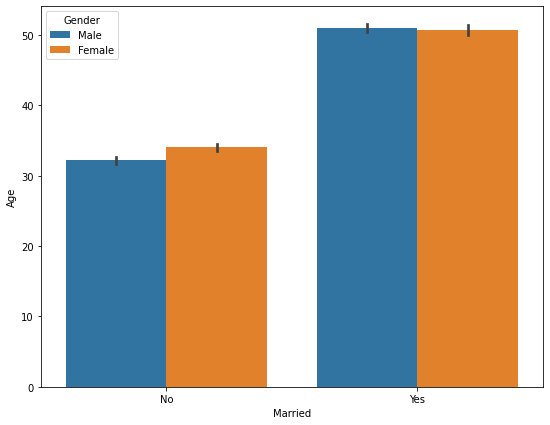

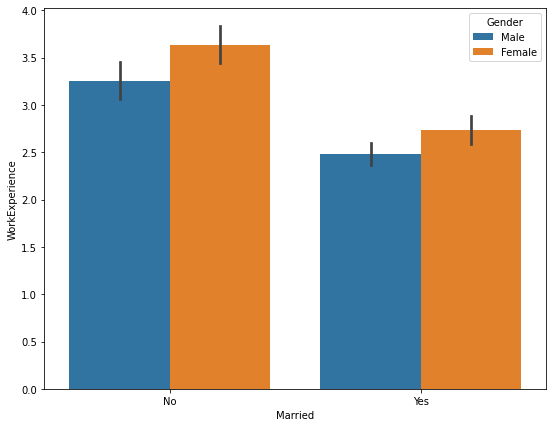

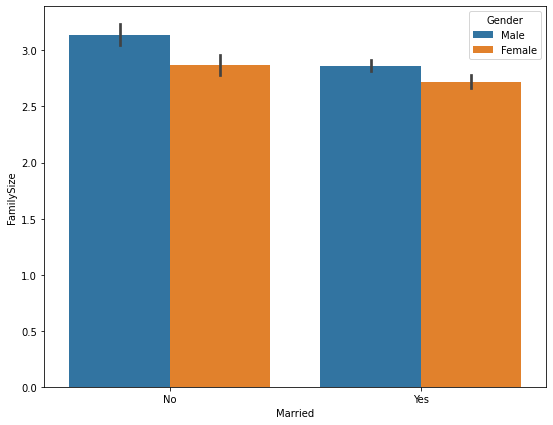

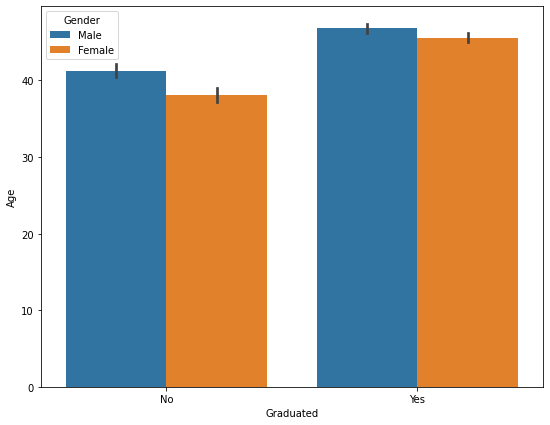

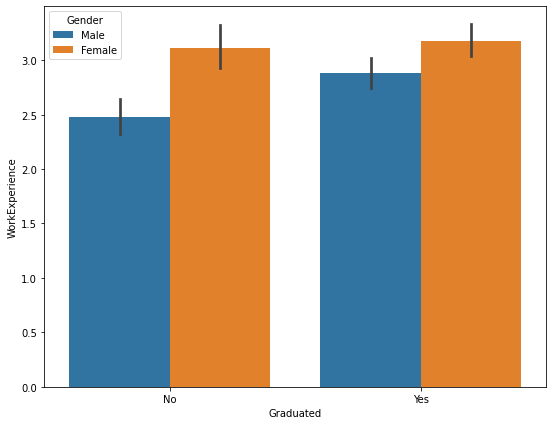

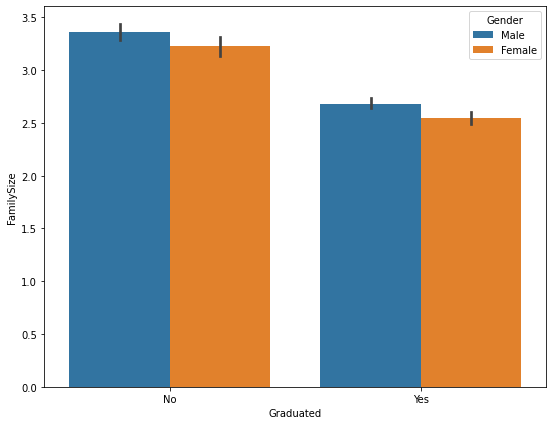

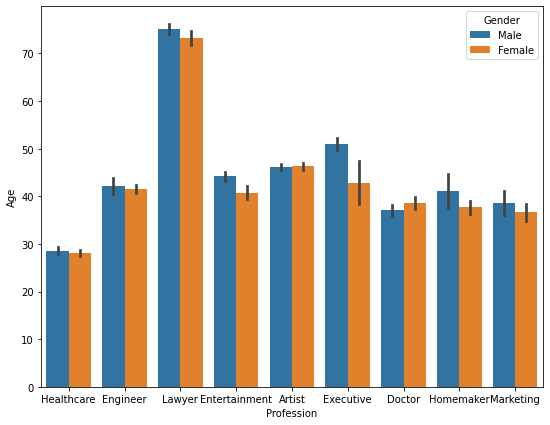

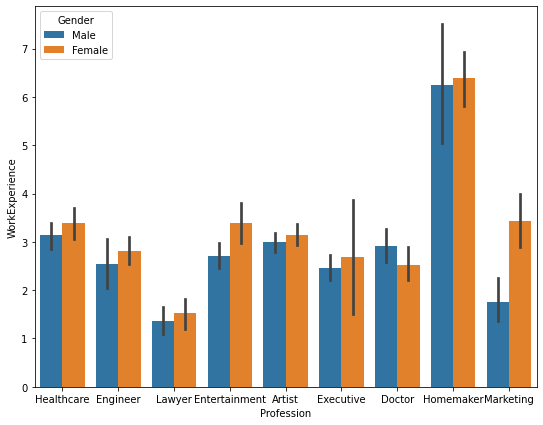

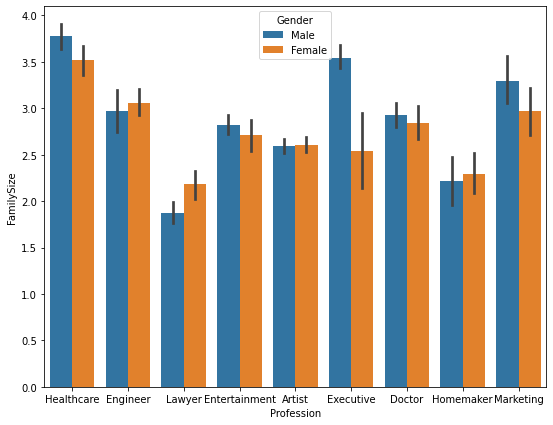

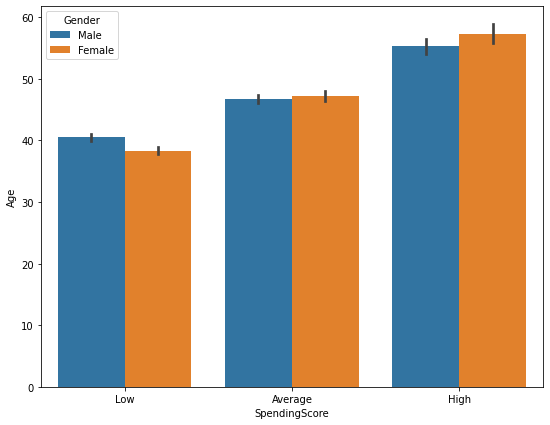

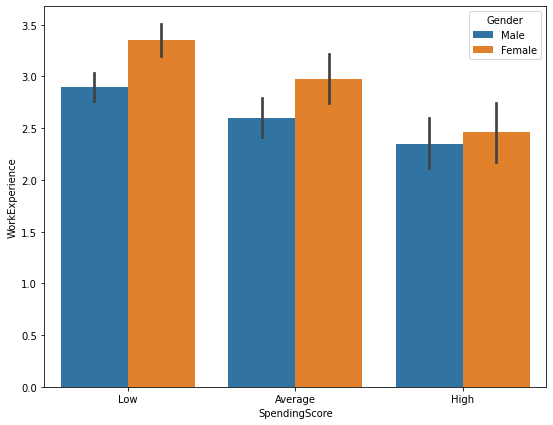

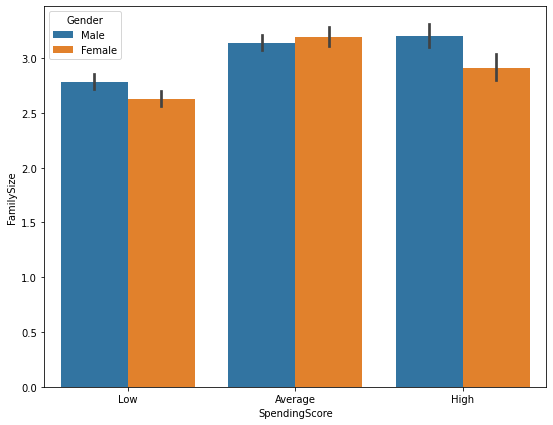

In [23]:
for i in cols1:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=data,x=i,y=j,hue='Gender')
        plt.show()

In [24]:
cols2=['Gender','Graduated','Profession','SpendingScore']

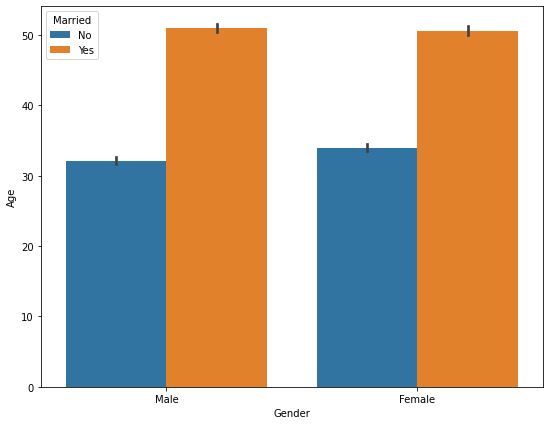

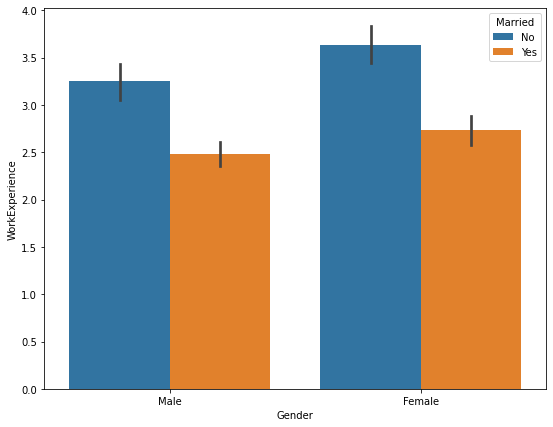

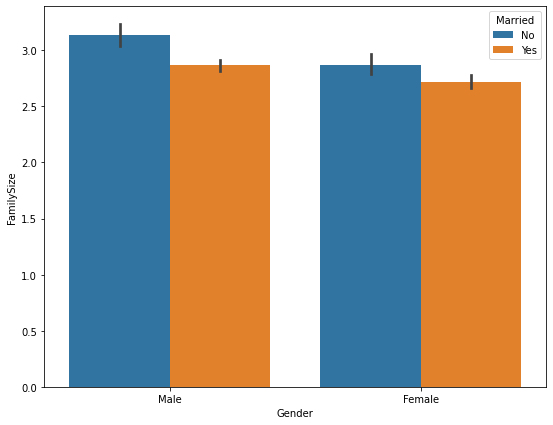

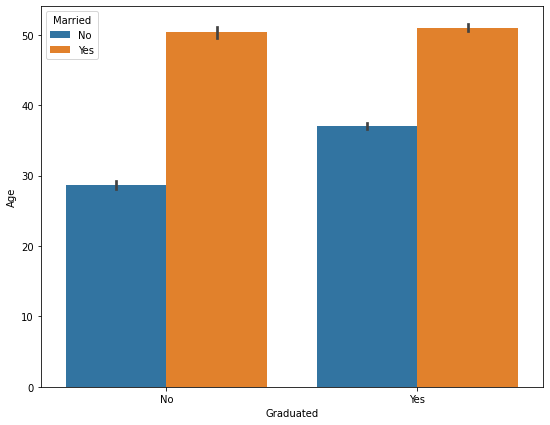

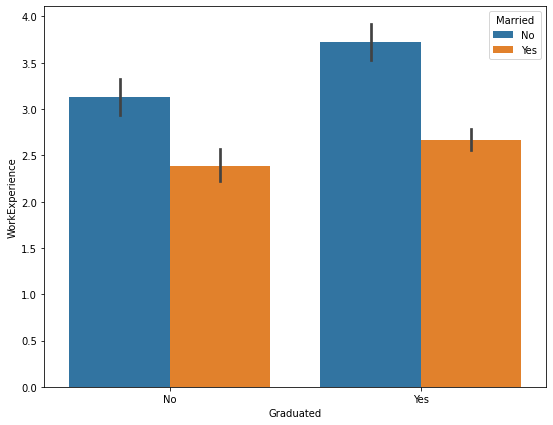

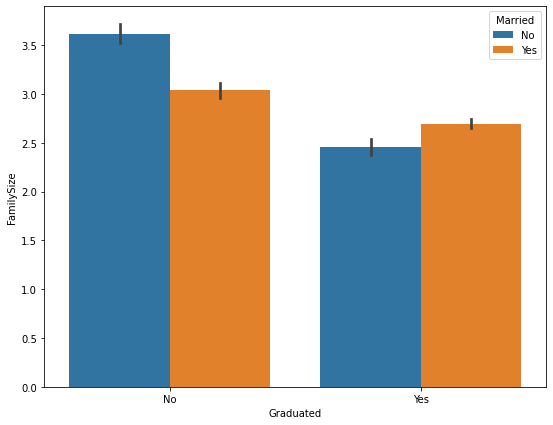

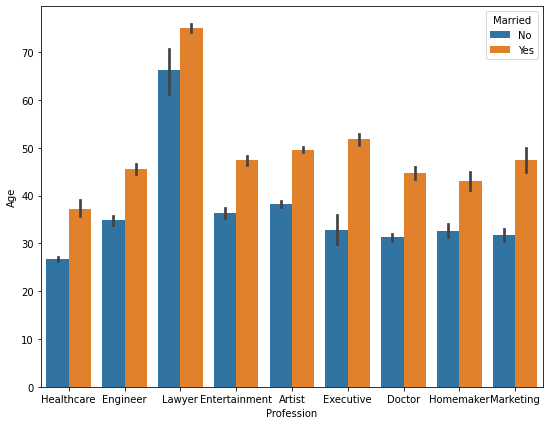

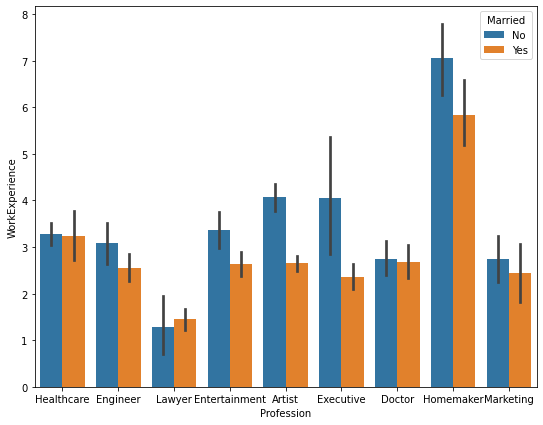

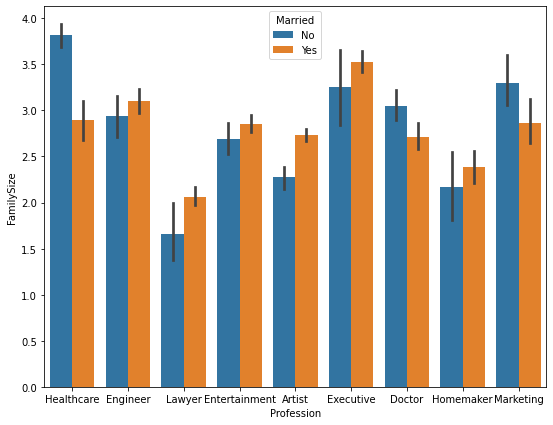

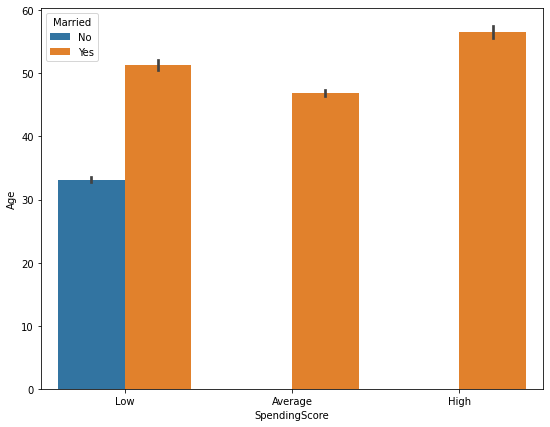

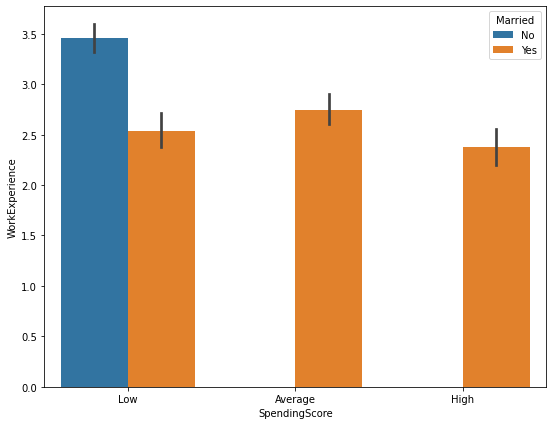

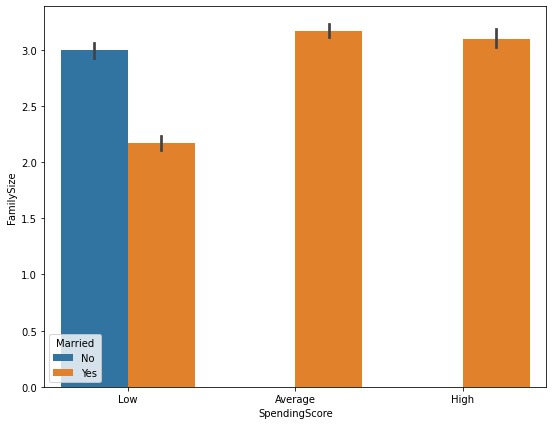

In [25]:
for i in cols2:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=data,x=i,y=j,hue='Married')
        plt.show()

In [26]:
cols3=['Gender','Married','Profession','SpendingScore']

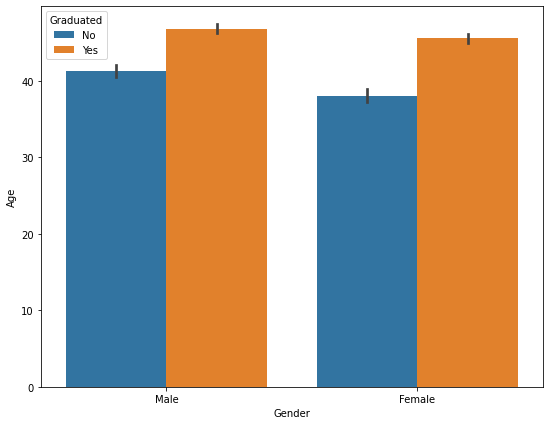

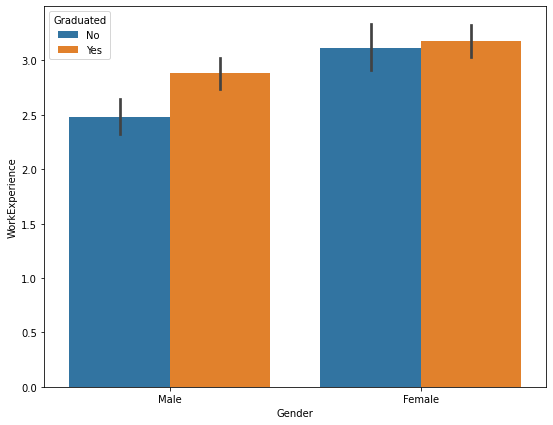

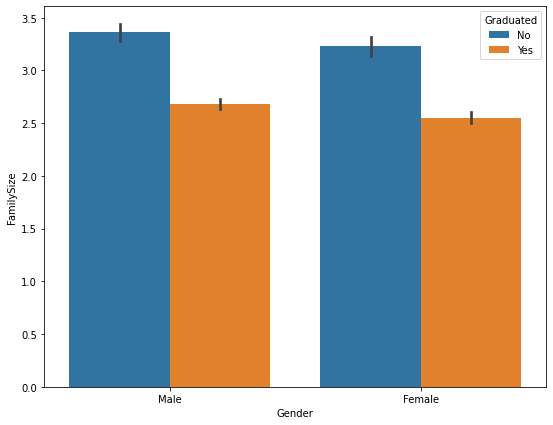

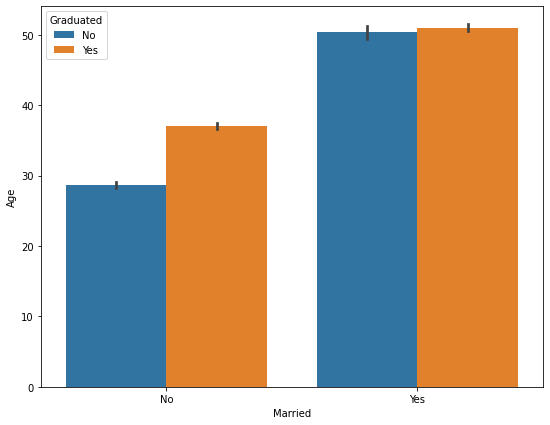

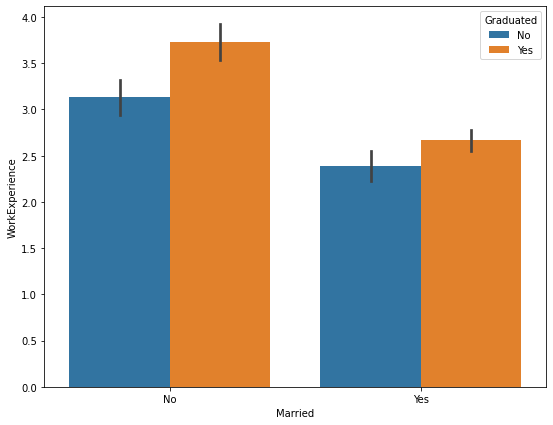

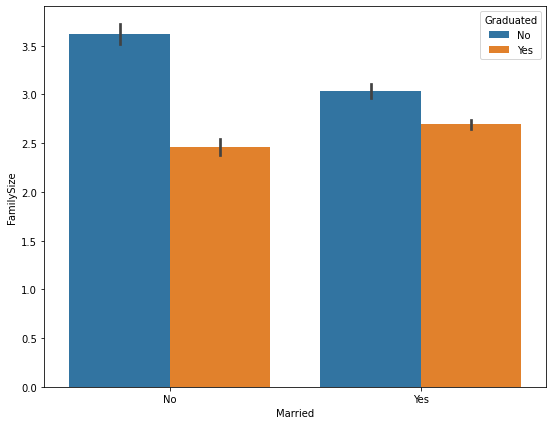

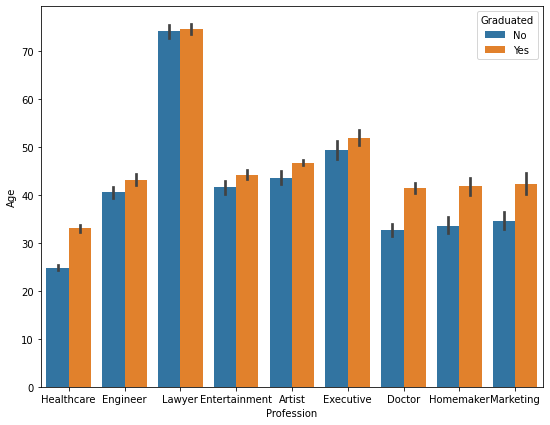

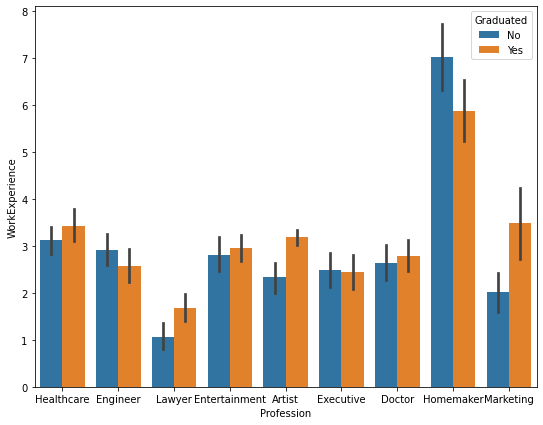

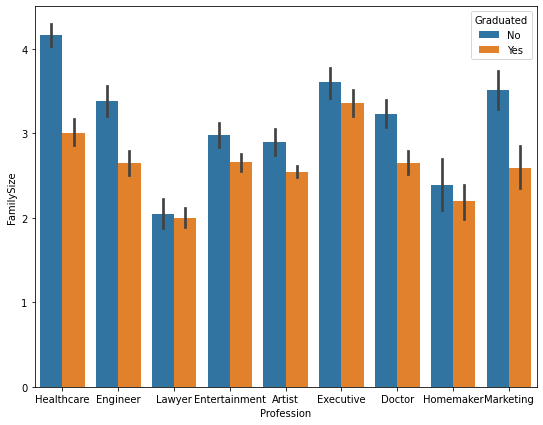

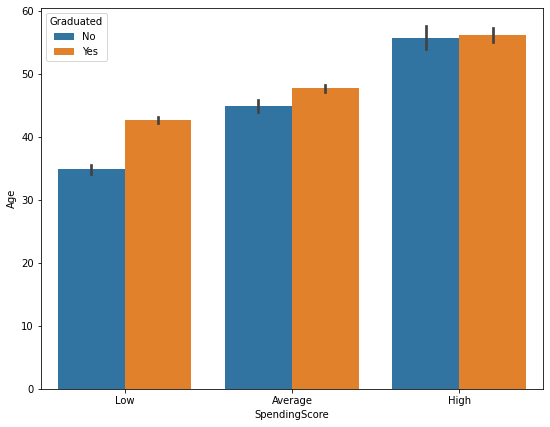

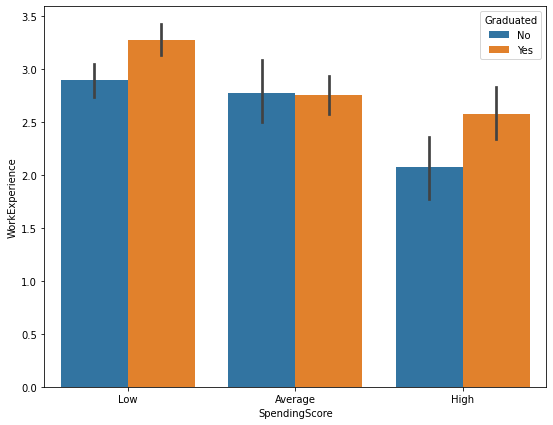

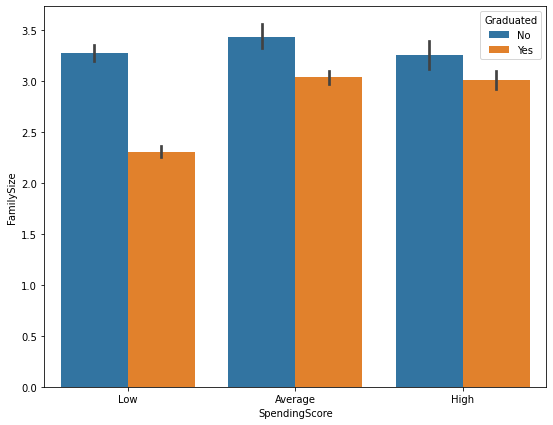

In [27]:
for i in cols3:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=data,x=i,y=j,hue='Graduated')
        plt.show()

In [28]:
cols4=['Gender','Married','Graduated','Profession']

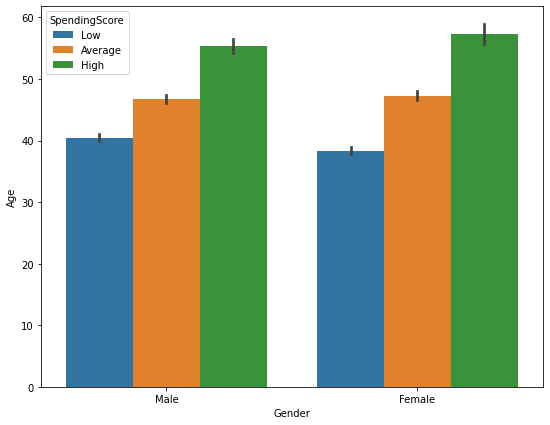

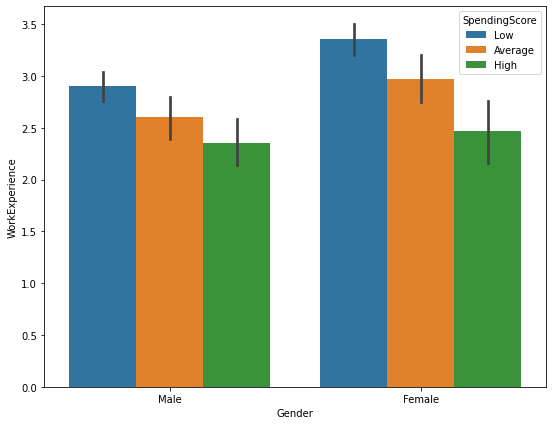

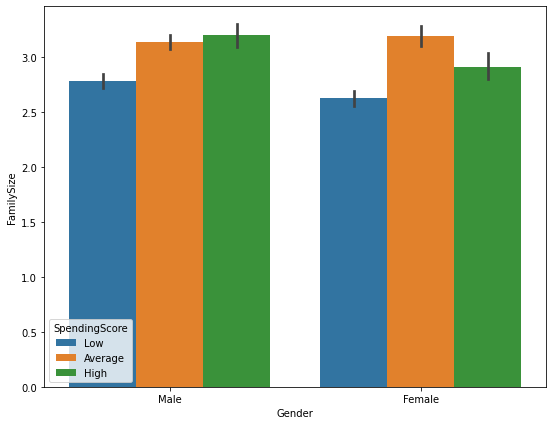

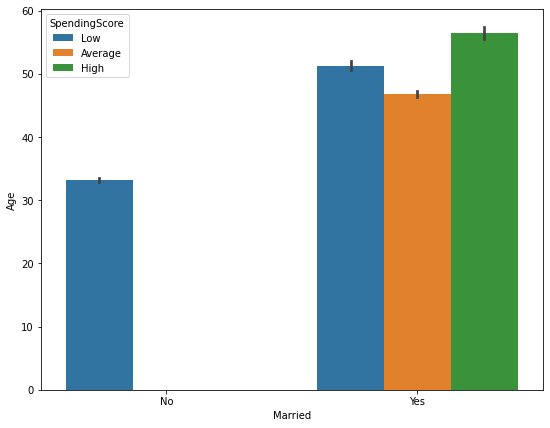

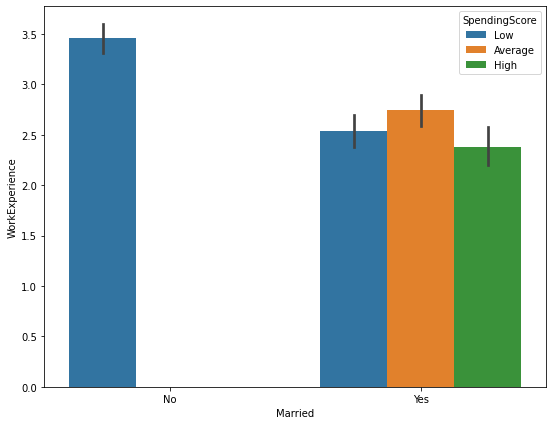

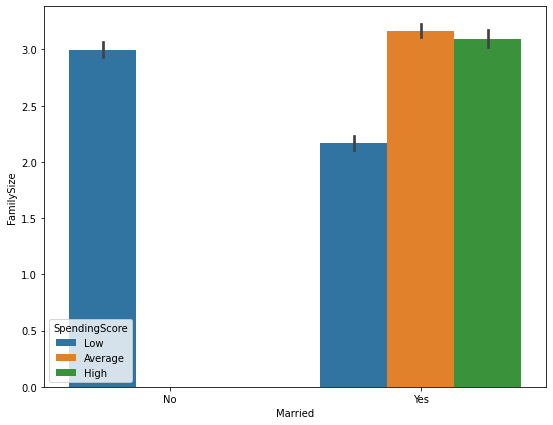

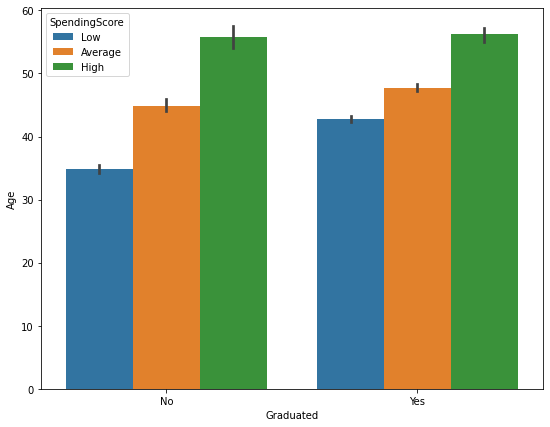

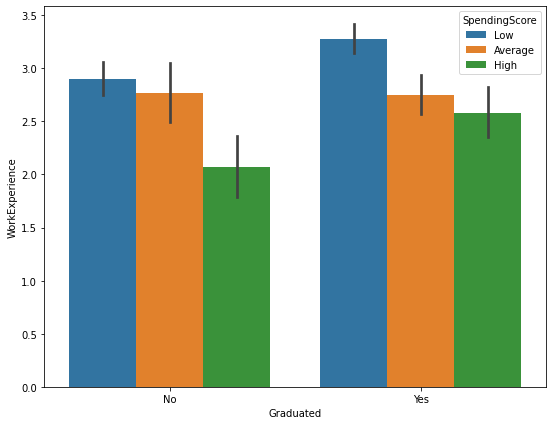

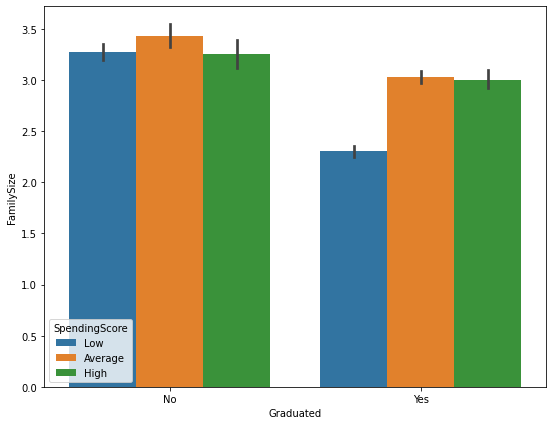

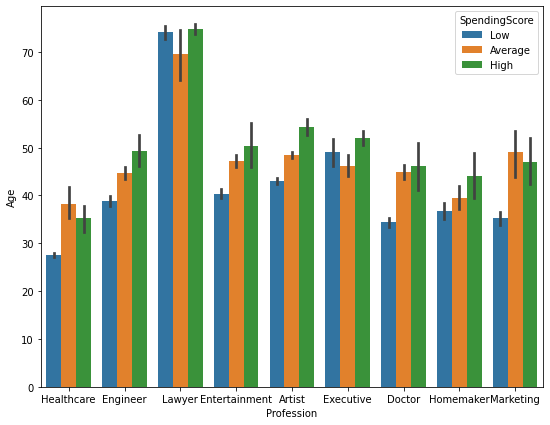

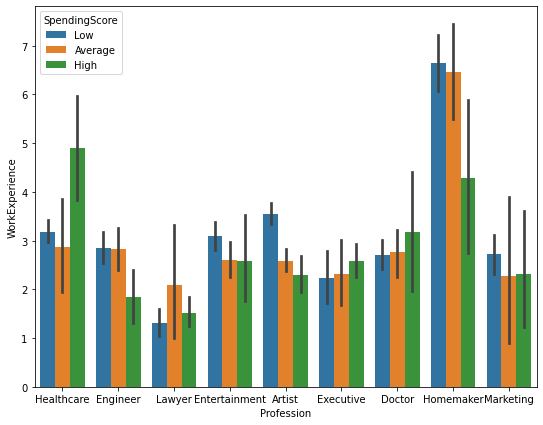

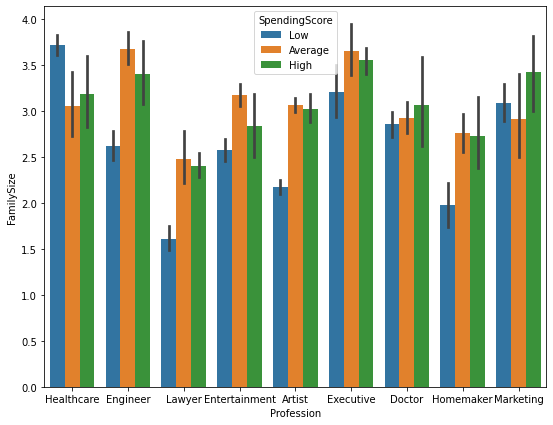

In [29]:
for i in cols4:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=data,x=i,y=j,hue='SpendingScore')
        plt.show()

In [30]:
cols5=['Gender','Married','Graduated','SpendingScore']

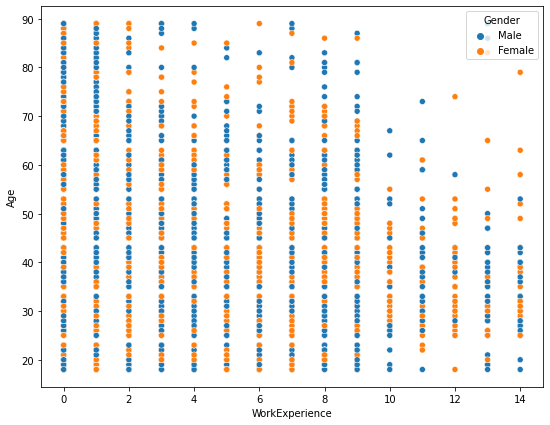

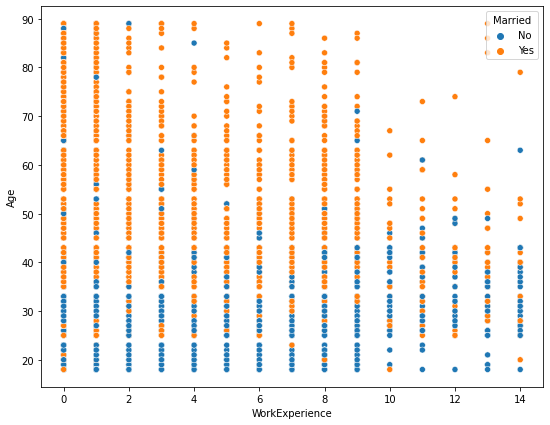

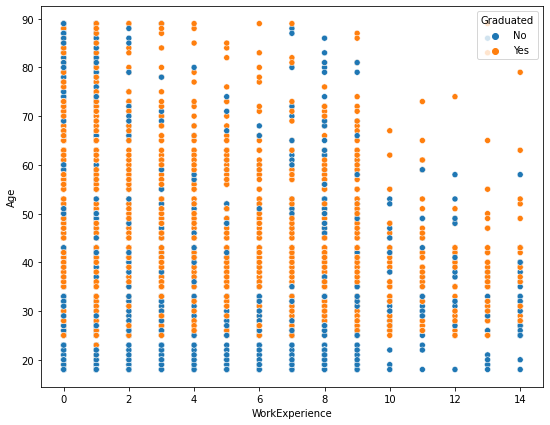

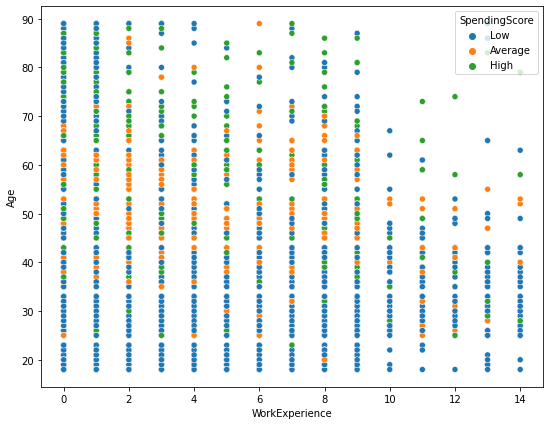

In [31]:
for i in cols5:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=data,x='WorkExperience',y='Age',hue=i)
    plt.show()

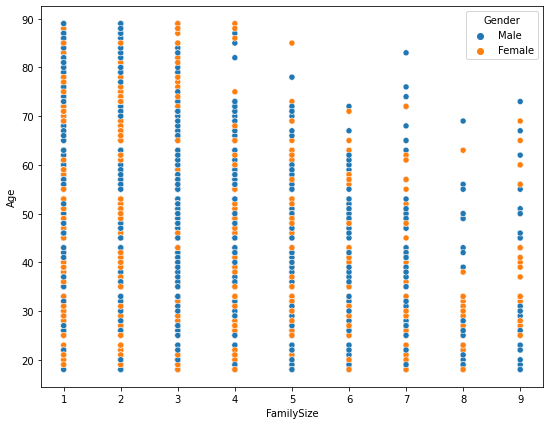

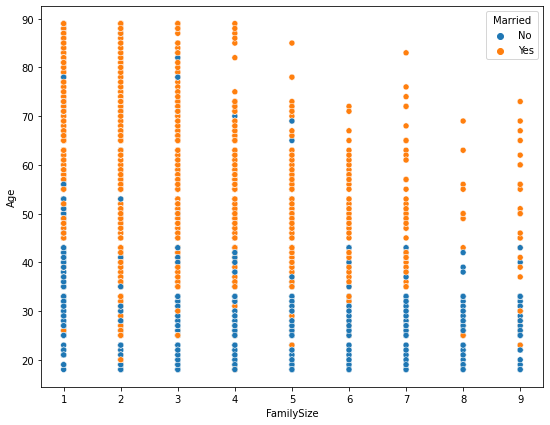

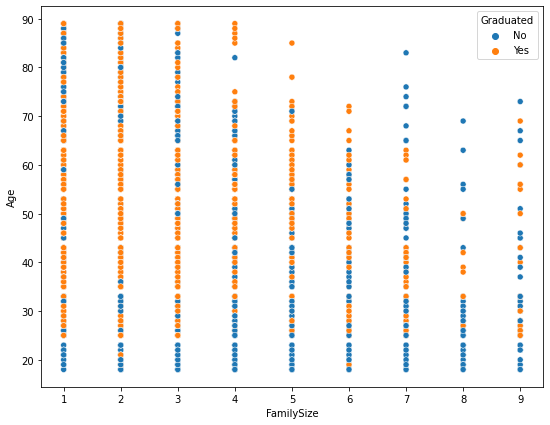

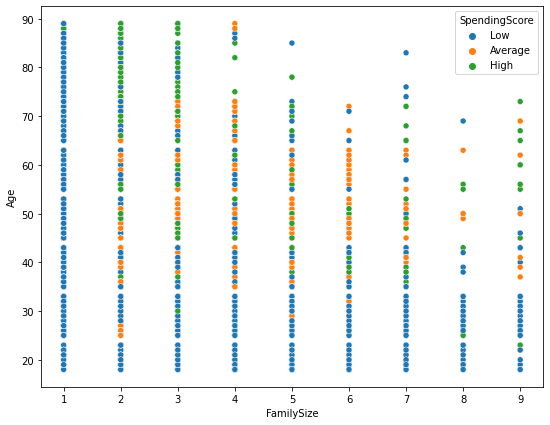

In [32]:
for i in cols5:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=data,x='FamilySize',y='Age',hue=i)
    plt.show()

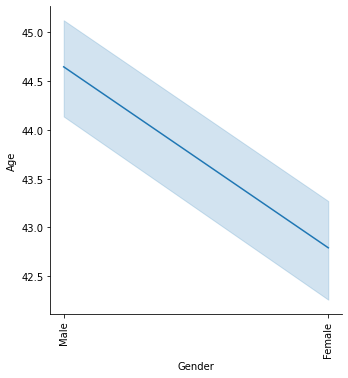

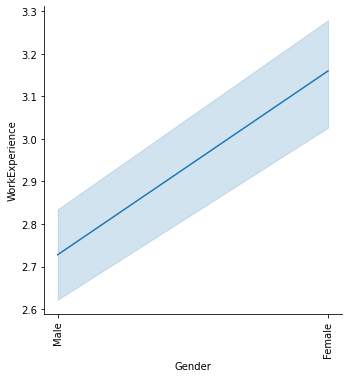

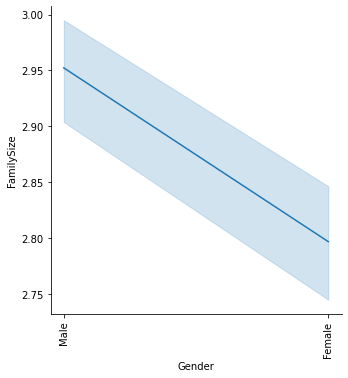

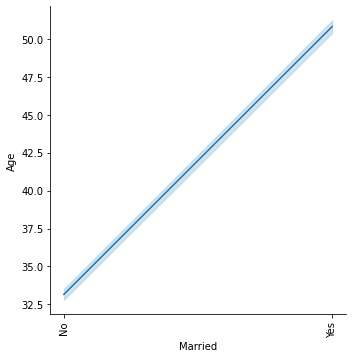

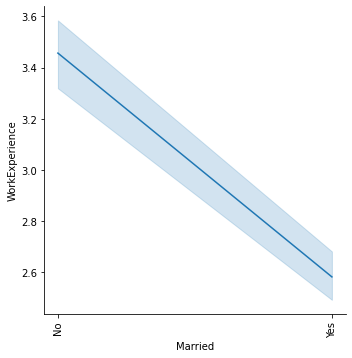

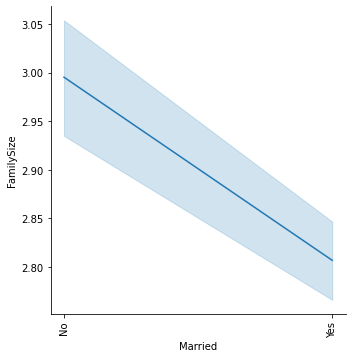

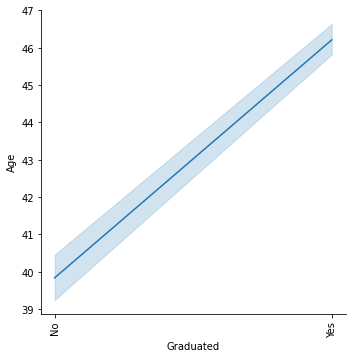

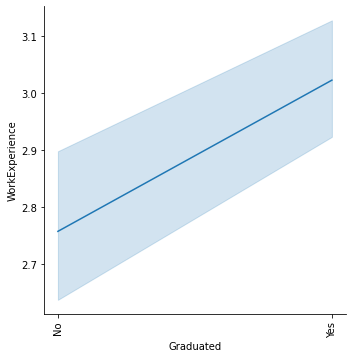

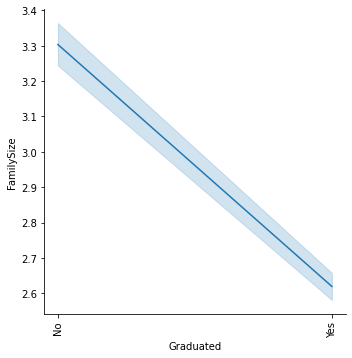

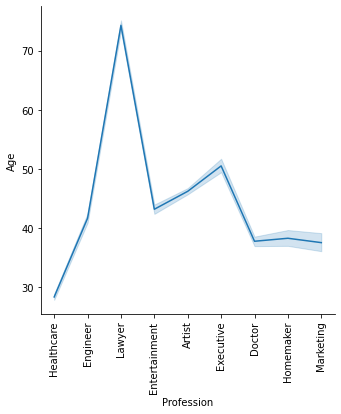

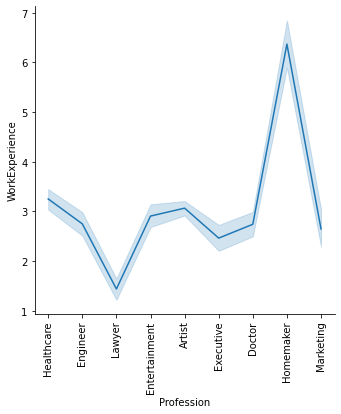

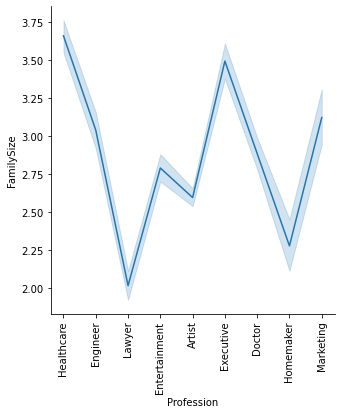

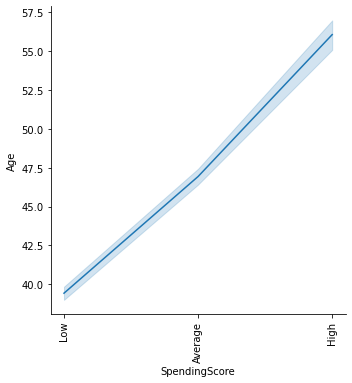

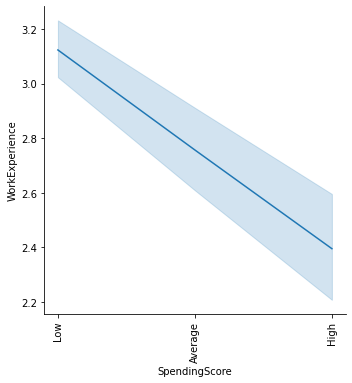

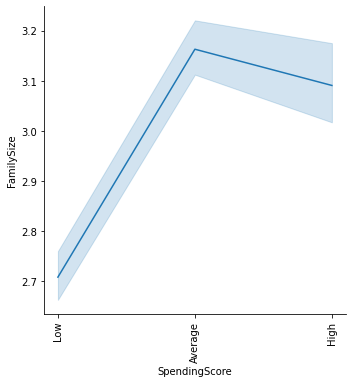

In [33]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.relplot(data=data,x=i,y=j,kind='line')
        plt.xticks(rotation=90)
        plt.show()

In [34]:
cols6=['Gender','Married','Graduated','Profession','WorkExperience','SpendingScore','FamilySize']

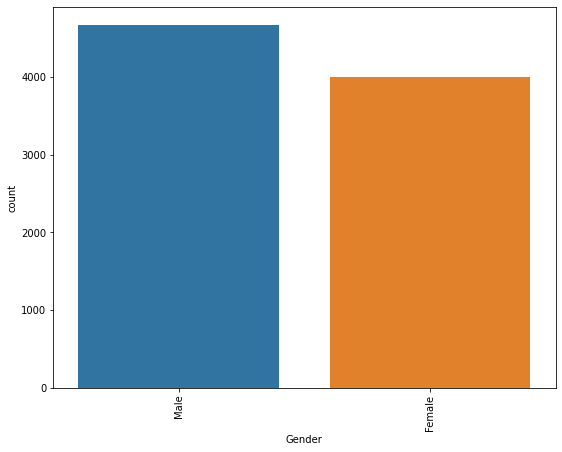

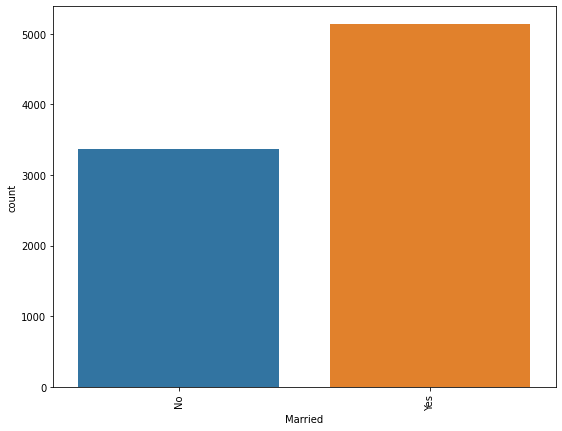

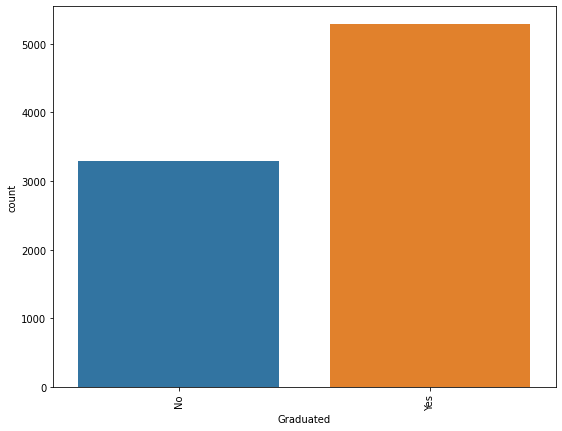

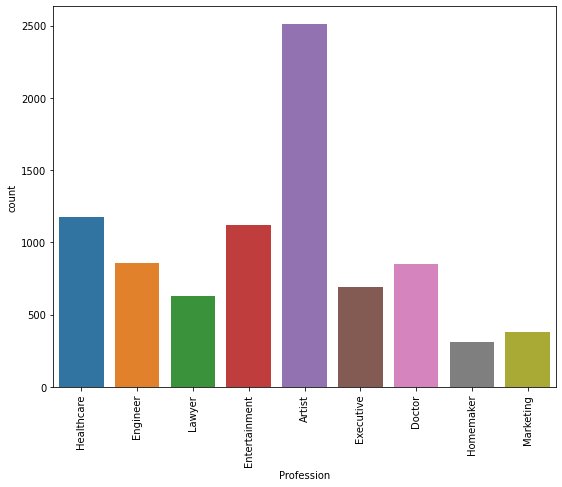

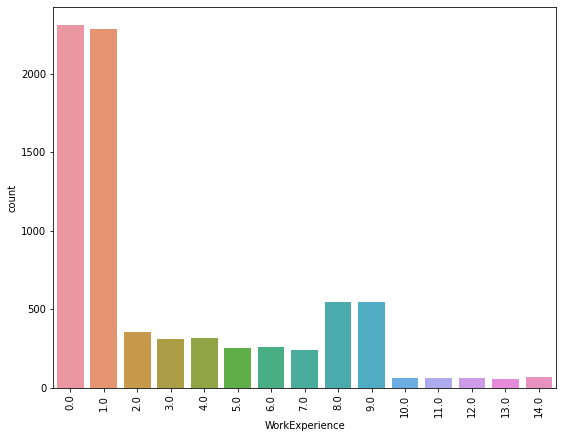

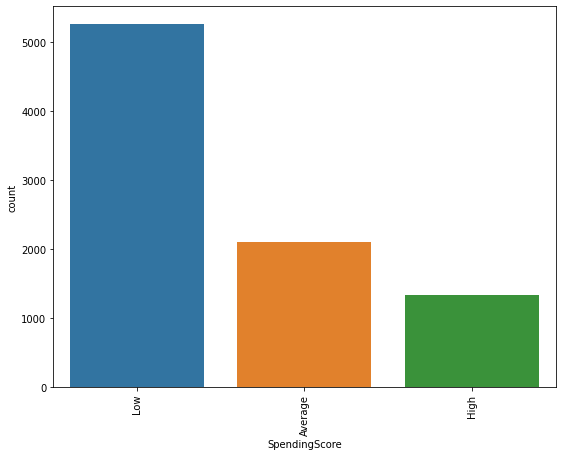

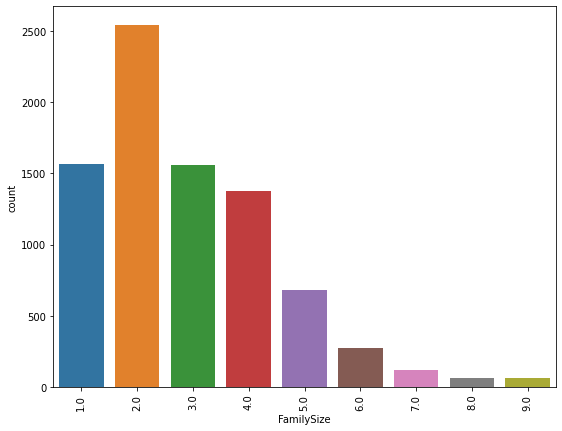

In [35]:
for i in cols6:
    plt.figure(figsize=(9,7))
    sns.countplot(data=data,x=i)
    plt.xticks(rotation=90)
    plt.show()

<Figure size 648x504 with 0 Axes>

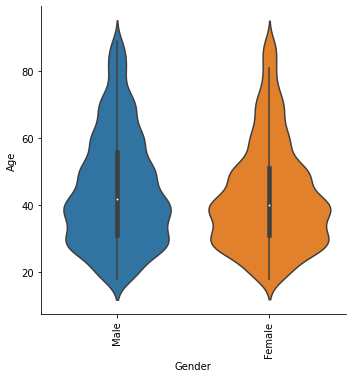

<Figure size 648x504 with 0 Axes>

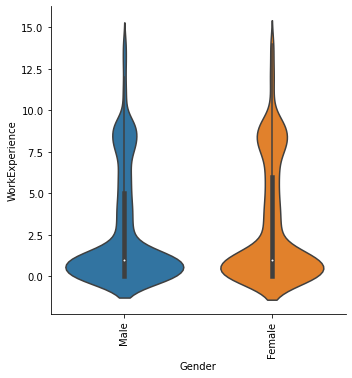

<Figure size 648x504 with 0 Axes>

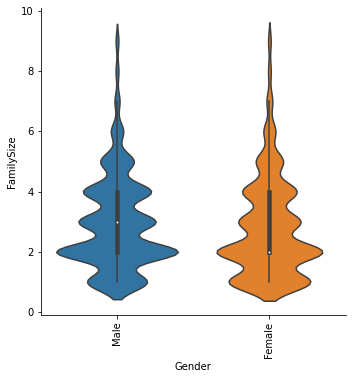

<Figure size 648x504 with 0 Axes>

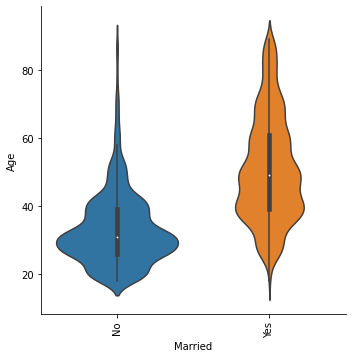

<Figure size 648x504 with 0 Axes>

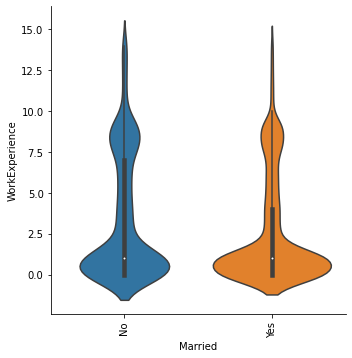

<Figure size 648x504 with 0 Axes>

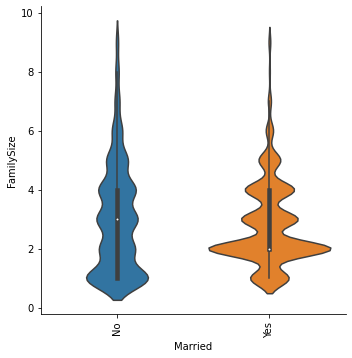

<Figure size 648x504 with 0 Axes>

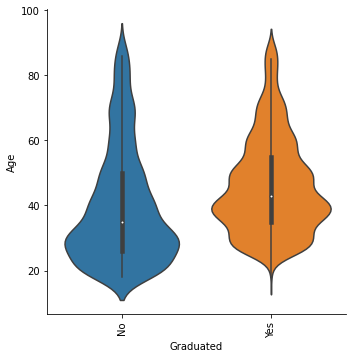

<Figure size 648x504 with 0 Axes>

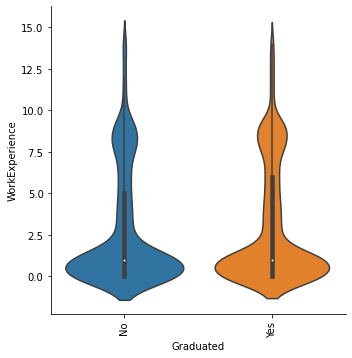

<Figure size 648x504 with 0 Axes>

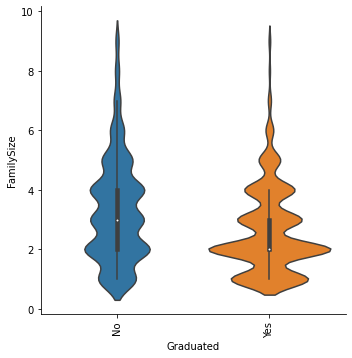

<Figure size 648x504 with 0 Axes>

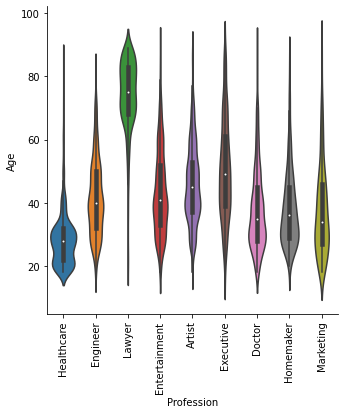

<Figure size 648x504 with 0 Axes>

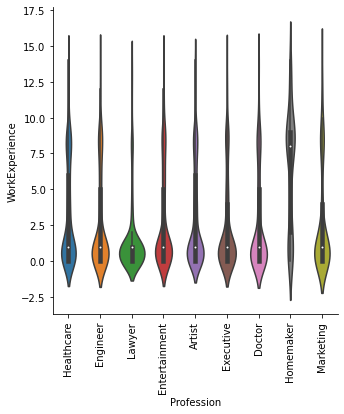

<Figure size 648x504 with 0 Axes>

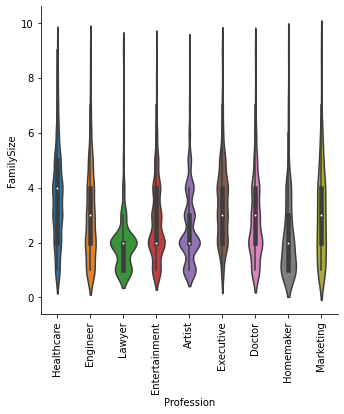

<Figure size 648x504 with 0 Axes>

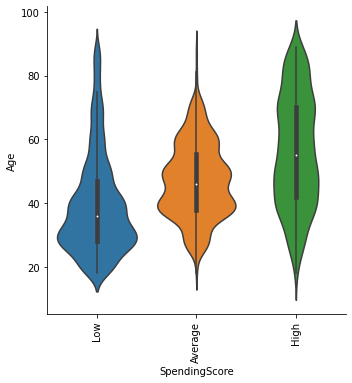

<Figure size 648x504 with 0 Axes>

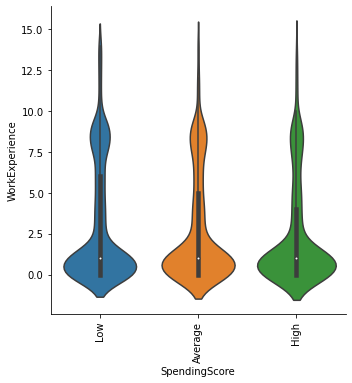

<Figure size 648x504 with 0 Axes>

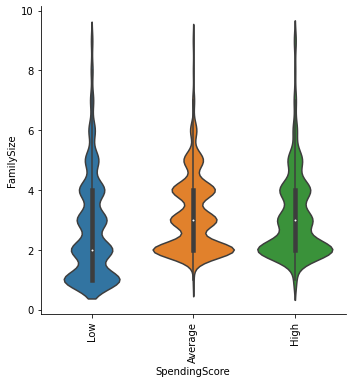

In [36]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.catplot(data=data,x=i,y=j,kind='violin')
        plt.xticks(rotation=90)
        plt.show()

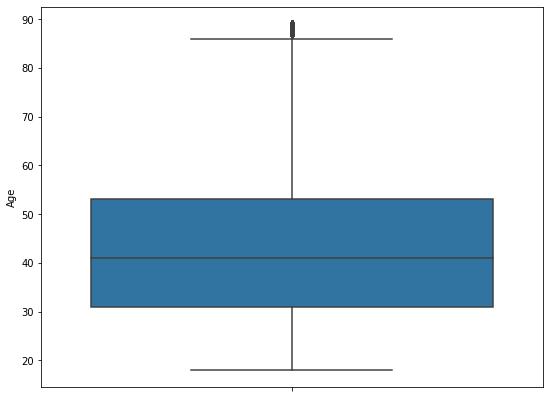

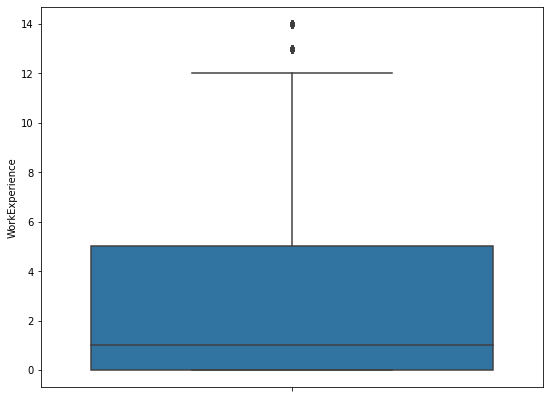

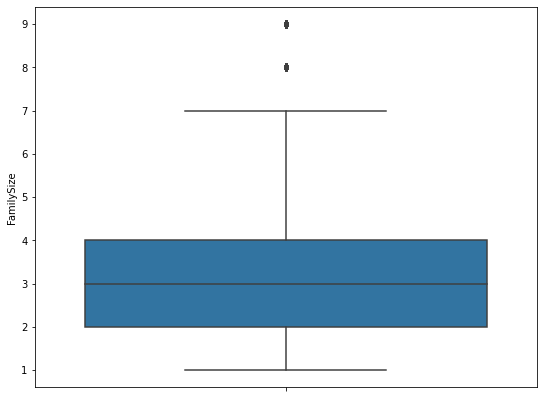

In [37]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=data,y=i)
    plt.show()

In [38]:
data.isnull().sum()

Gender              0
Married           185
Age                 0
Graduated          98
Profession        158
WorkExperience    962
SpendingScore       0
FamilySize        430
dtype: int64

In [39]:
data.shape

(8676, 8)

In [40]:
data.dropna(subset=['Married','Graduated','Profession','WorkExperience','FamilySize'],inplace=True)

In [41]:
data.isnull().values.any()

False

In [42]:
data.apply(pd.isnull).sum()

Gender            0
Married           0
Age               0
Graduated         0
Profession        0
WorkExperience    0
SpendingScore     0
FamilySize        0
dtype: int64

In [43]:
data.shape

(7037, 8)

In [44]:
data[data['Age']>86].shape

(73, 8)

In [45]:
data=data[data['Age']<86]

In [46]:
data[data['WorkExperience']>10].shape

(228, 8)

In [47]:
data=data[data['WorkExperience']<10]

In [48]:
data[data['FamilySize']>7].shape

(98, 8)

In [49]:
data=data[data['FamilySize']<7]

In [50]:
data.shape

(6452, 8)

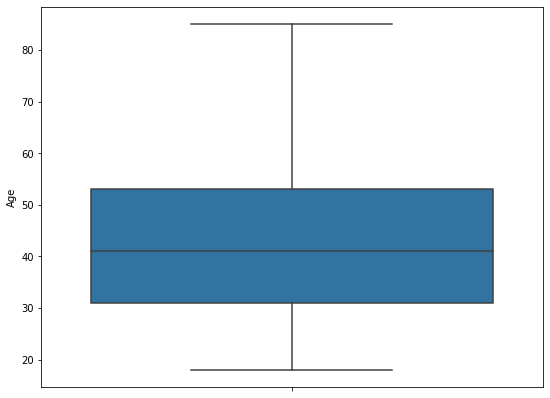

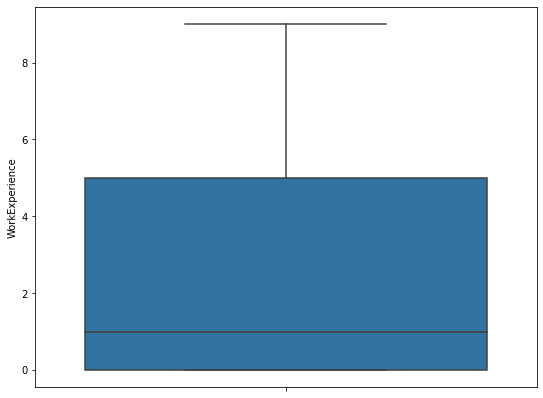

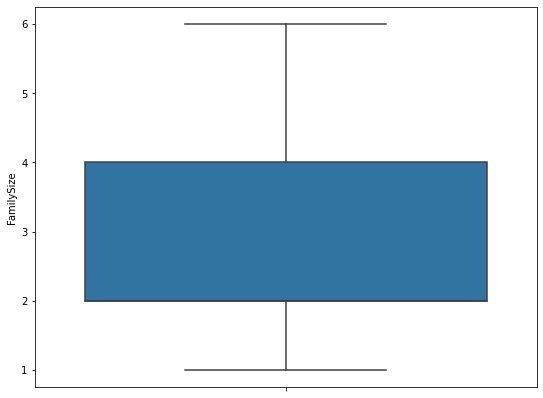

In [51]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=data,y=i)
    plt.show()

In [52]:
data[data['Age']>82].shape

(71, 8)

In [53]:
data=data[data['Age']<82]

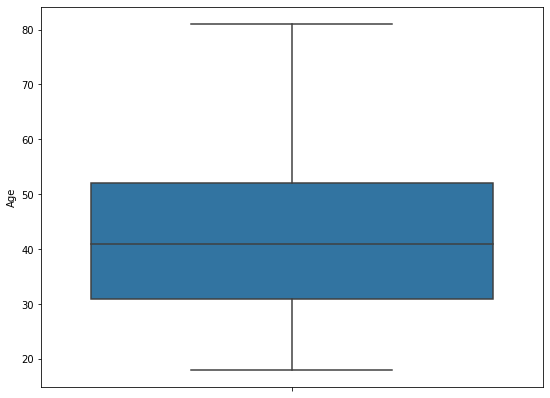

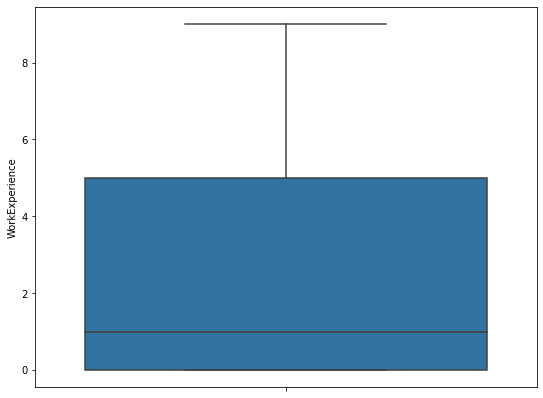

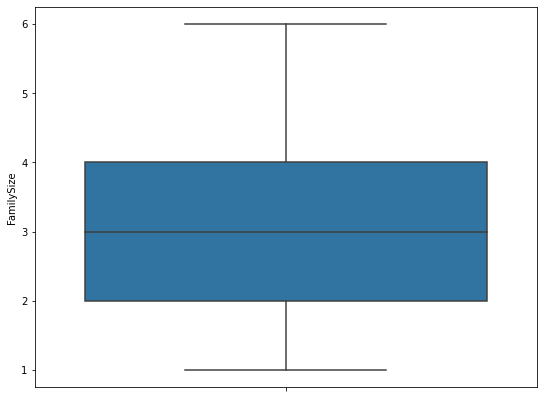

In [54]:
for i in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=data,y=i)
    plt.show()

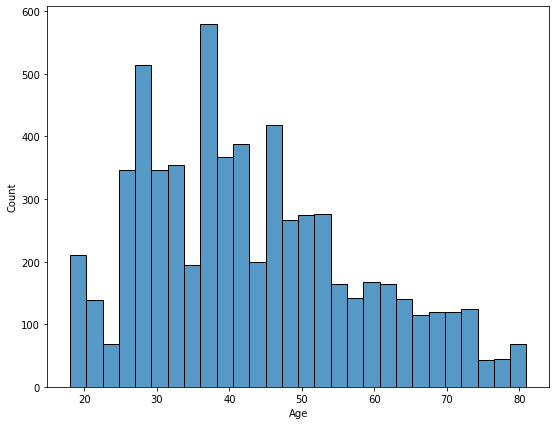

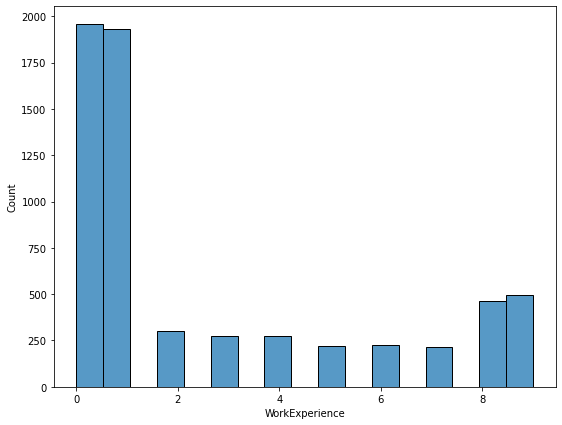

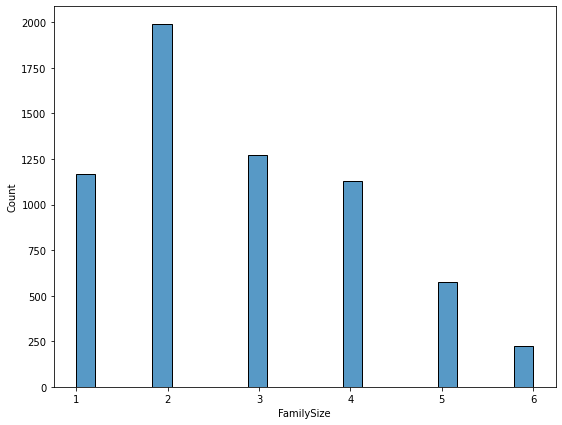

In [55]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.histplot(data=data,x=column)
    plt.show()

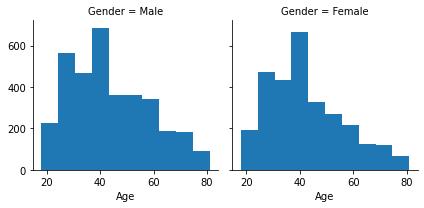

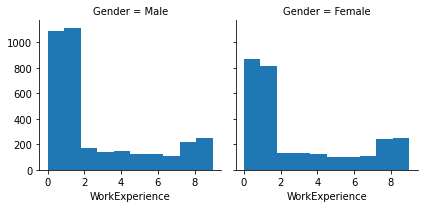

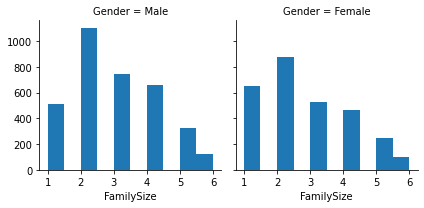

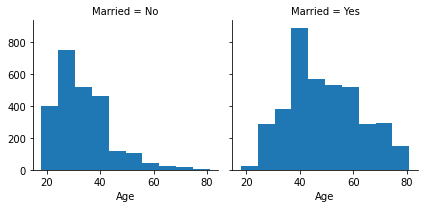

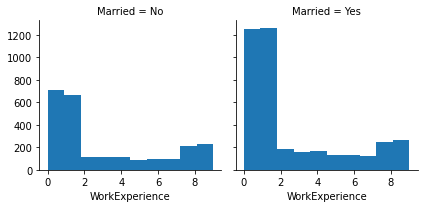

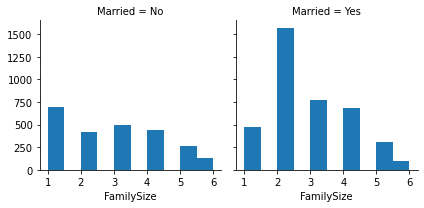

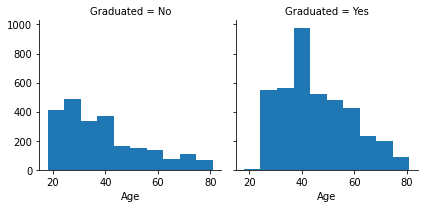

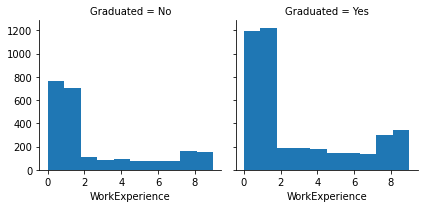

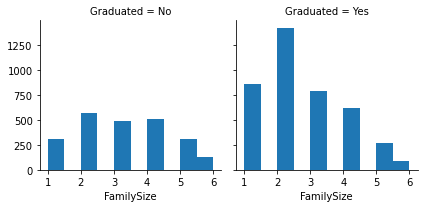

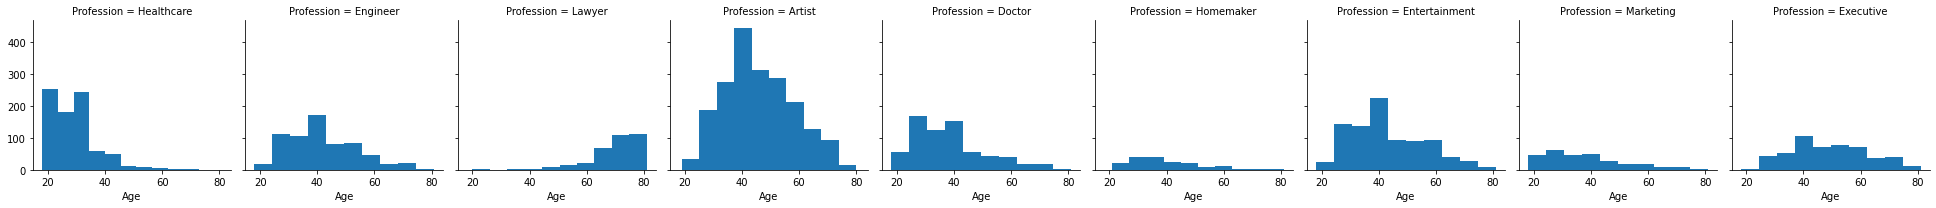

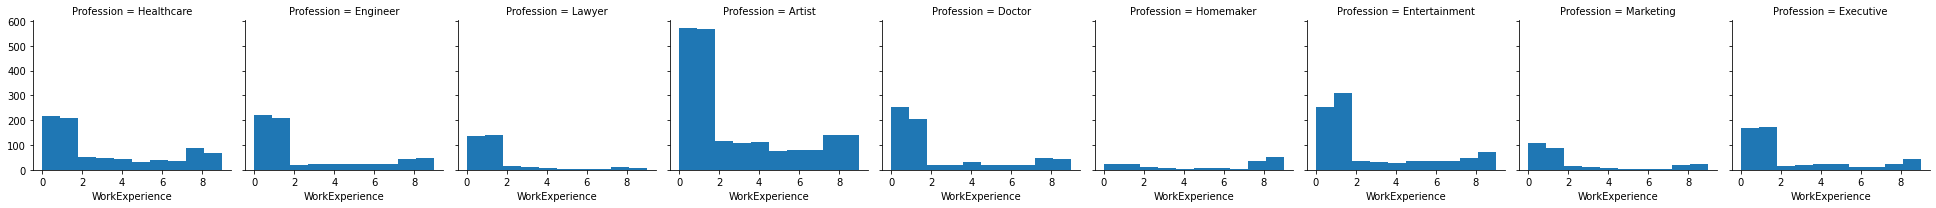

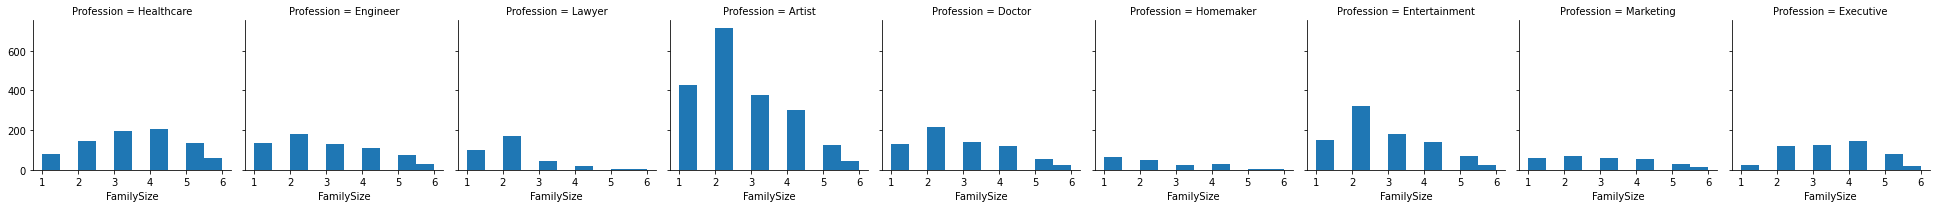

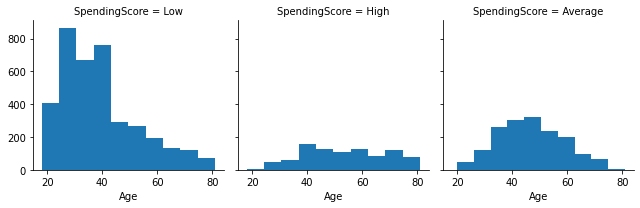

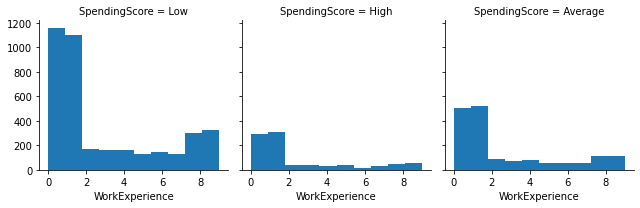

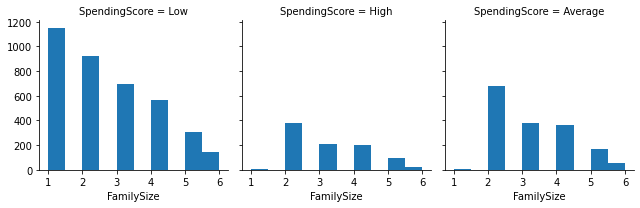

In [56]:
for i in categorical_columns:
    for j in numerical_columns:
        b=sns.FacetGrid(data=data,col=i)
        b.map(plt.hist,j)
        plt.show()

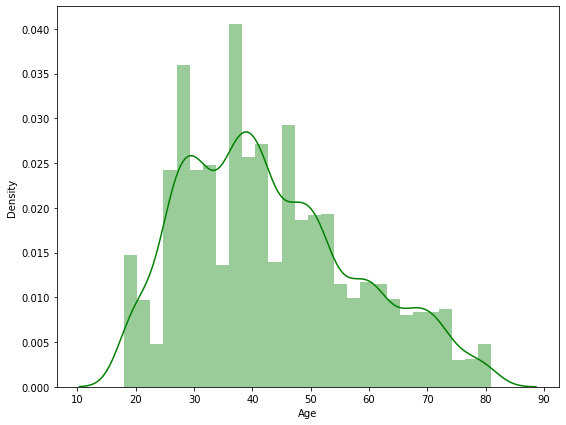

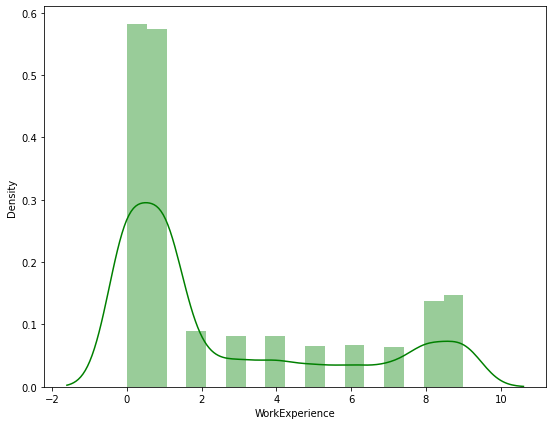

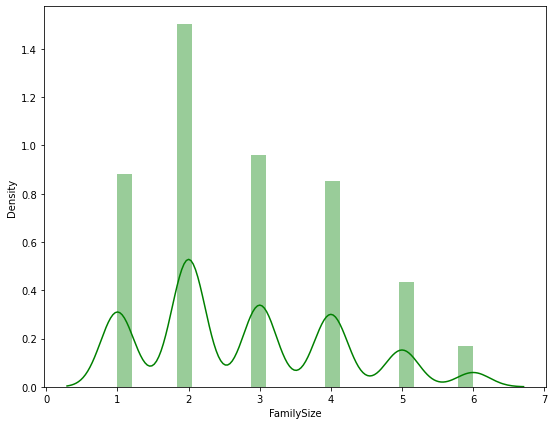

In [57]:
for column in numerical_columns:
    plt.figure(figsize=(9,7))
    sns.distplot(data[column],color='green')
    plt.show()

In [58]:
data['SpendingScore']=data['SpendingScore'].replace({'Low':0,'Average':1,'High':2})

In [59]:
data.head()

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.0,0,4.0
2,Female,Yes,67,Yes,Engineer,1.0,0,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,2,2.0
5,Male,Yes,56,No,Artist,0.0,1,2.0
6,Male,No,32,Yes,Healthcare,1.0,0,3.0


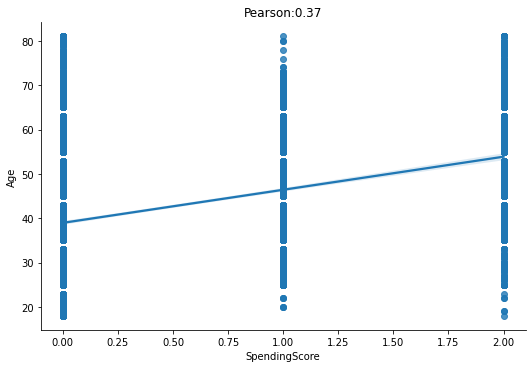

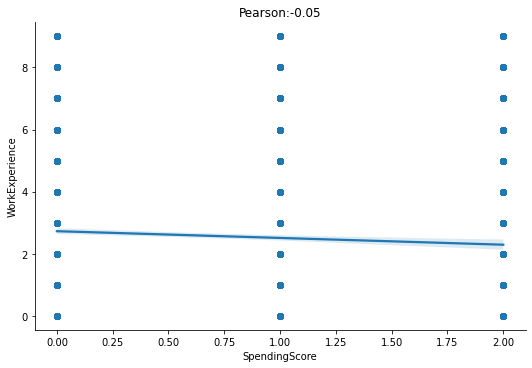

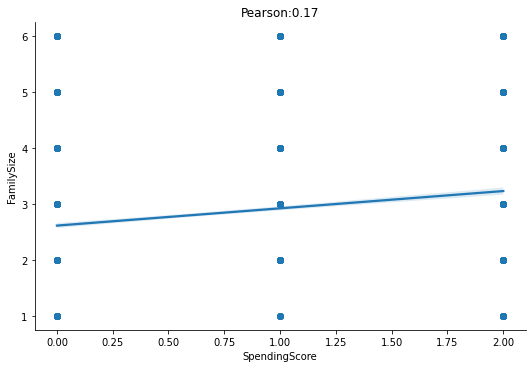

In [60]:
for i in numerical_columns:
    corr1,_=pearsonr(data['SpendingScore'],data[i])
    sns.lmplot(data=data,x='SpendingScore',y=i,aspect=1.5)
    plt.title('Pearson:{:.2f}'.format(corr1),color='black')
    plt.show()

In [61]:
categorical_columns_new,numerical_columns_new=[],[]
for column in data.columns:
    if data[column].dtype=='object':
        categorical_columns_new.append(column)
    else:
        numerical_columns_new.append(column)

In [62]:
categorical_columns_new

['Gender', 'Married', 'Graduated', 'Profession']

In [63]:
numerical_columns_new

['Age', 'WorkExperience', 'SpendingScore', 'FamilySize']

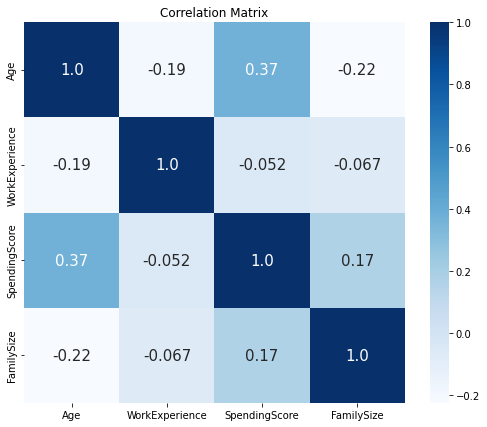

In [64]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [65]:
X_numerics=data[['Age','SpendingScore']]

In [66]:
n_clusters=range(2,11)
clusters_inertia=[]
s_scores=[]
for n in n_clusters:
    KM_est=KMeans(n_clusters=n,init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg=silhouette_score(X_numerics,KM_est.labels_)
    s_scores.append(silhouette_avg)

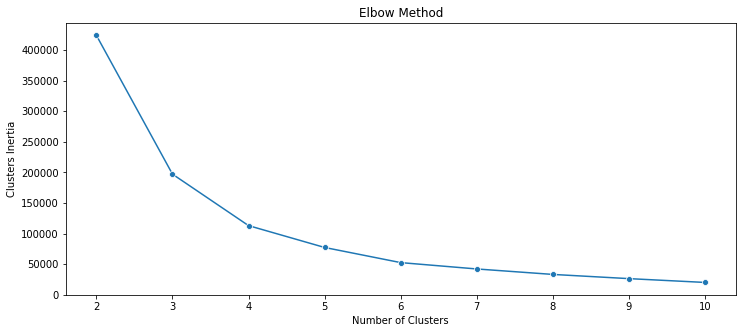

In [67]:
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(x=n_clusters,y=clusters_inertia,marker='o',ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Clusters Inertia')
plt.show()

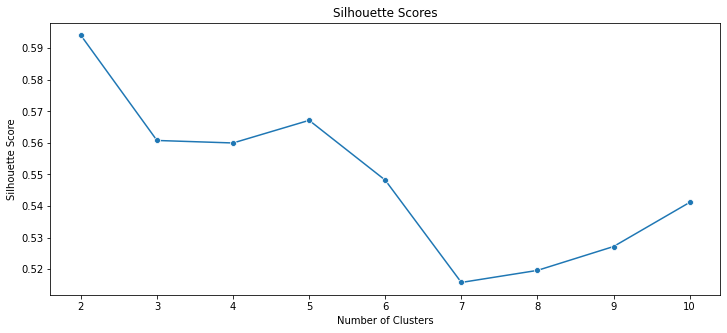

In [68]:
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(x=n_clusters,y=s_scores,marker='o',ax=ax)
ax.set_title('Silhouette Scores')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
plt.show()

In [69]:
KM_2_clusters=KMeans(n_clusters=2,init='k-means++').fit(X_numerics)
KM2_clustered=X_numerics.copy()
KM2_clustered.loc[:,'Cluster']=KM_2_clusters.labels_

In [70]:
KM2_clustered

,Age,SpendingScore,Cluster
0,22,0,0
2,67,0,1
3,67,2,1
5,56,1,1
6,32,0,0
...,...,...,...
10684,46,0,1
10685,27,0,0
10686,42,0,0
10689,35,0,0


In [71]:
KM_2_clusters.cluster_centers_

array([[33.18531015,  0.36153647],
       [58.22852577,  0.83459848]])

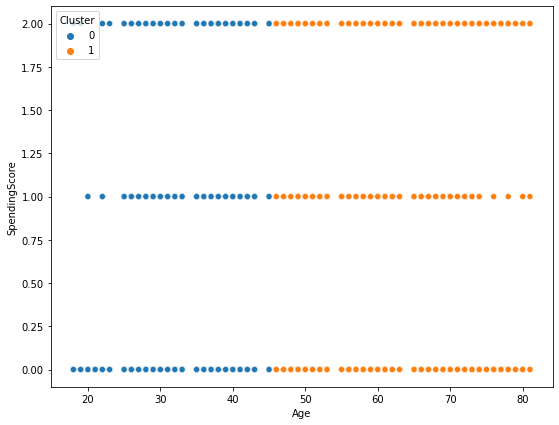

In [72]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=KM2_clustered,x='Age',y='SpendingScore',hue='Cluster')
plt.show()

In [73]:
pipeline=Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='median')),
    ('std_scaler',StandardScaler())
])

In [74]:
data

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize
0,Male,No,22,No,Healthcare,1.0,0,4.0
2,Female,Yes,67,Yes,Engineer,1.0,0,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,2,2.0
5,Male,Yes,56,No,Artist,0.0,1,2.0
6,Male,No,32,Yes,Healthcare,1.0,0,3.0
...,...,...,...,...,...,...,...,...
10684,Male,Yes,46,Yes,Entertainment,5.0,0,1.0
10685,Female,No,27,No,Marketing,8.0,0,4.0
10686,Female,Yes,42,Yes,Artist,0.0,0,2.0
10689,Female,No,35,Yes,Entertainment,1.0,0,2.0


In [75]:
col_tr=ColumnTransformer([
    ('pipeline',pipeline,numerical_columns_new),
    ('one_hot',OneHotEncoder(),categorical_columns_new)
])

In [76]:
data_n=col_tr.fit_transform(data)

In [77]:
data_n

array([[-1.4324112 , -0.5201856 , -0.74875598, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.63013506, -0.5201856 , -0.74875598, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.63013506, -0.84395173,  1.98478395, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.07127953, -0.84395173, -0.74875598, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54767561, -0.5201856 , -0.74875598, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00322294,  2.06994341, -0.74875598, ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(data_n)
pca_df=pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])
pca_df['cluster']=KM_2_clusters.labels_

In [79]:
pca_df

,PCA1,PCA2,cluster
0,-1.828399,1.238039,0
1,1.051293,-1.812723,1
2,2.800088,-0.087289,1
3,1.354158,-0.130498,1
4,-1.148497,0.158454,0
...,...,...,...
6351,-0.058398,-1.571421,1
6352,-2.148656,0.528984,0
6353,0.050836,-0.788067,0
6354,-0.959101,-0.720247,0


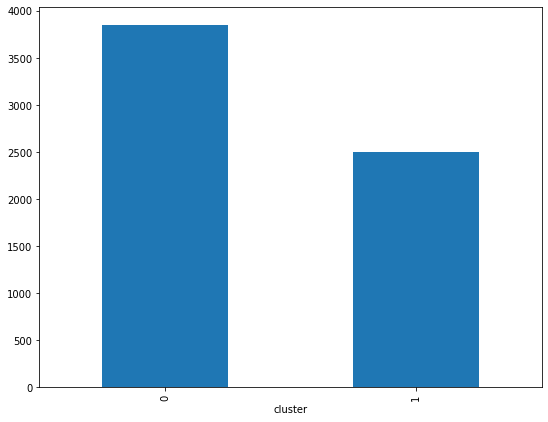

In [80]:
pca_df['cluster'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

In [81]:
KM_2_clusters.cluster_centers_

array([[33.18531015,  0.36153647],
       [58.22852577,  0.83459848]])

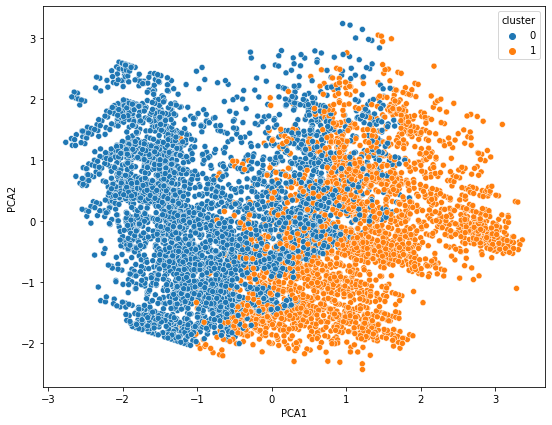

In [82]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='cluster')
plt.show()

In [83]:
bandwidth=estimate_bandwidth(X=X_numerics,quantile=0.1)
ms=MeanShift(bandwidth=bandwidth).fit(X_numerics)

In [84]:
X_numerics['Label']=ms.labels_

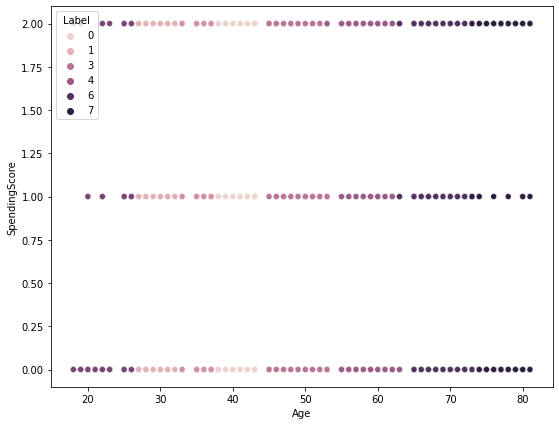

In [85]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=X_numerics,x='Age',y='SpendingScore',hue='Label')
plt.show()

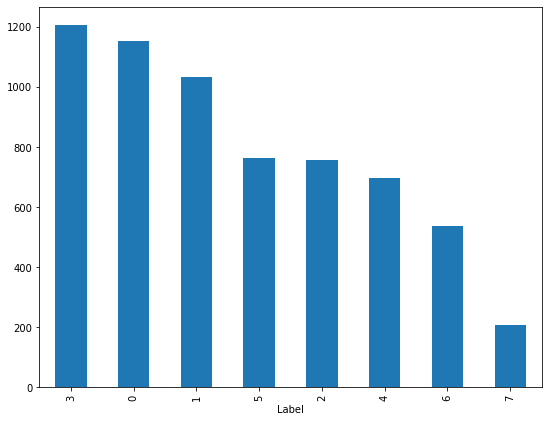

In [86]:
X_numerics['Label'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

In [87]:
pca_df['cluster_ms']=ms.labels_

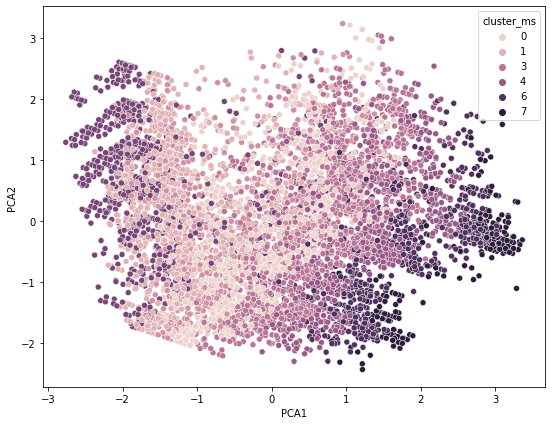

In [88]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='cluster_ms')
plt.show()

In [89]:
X_numerics.drop('Label',axis=1,inplace=True)

In [90]:
agglom=AgglomerativeClustering(n_clusters=2,linkage='average').fit(X_numerics)

In [91]:
X_numerics['Labels']=agglom.labels_

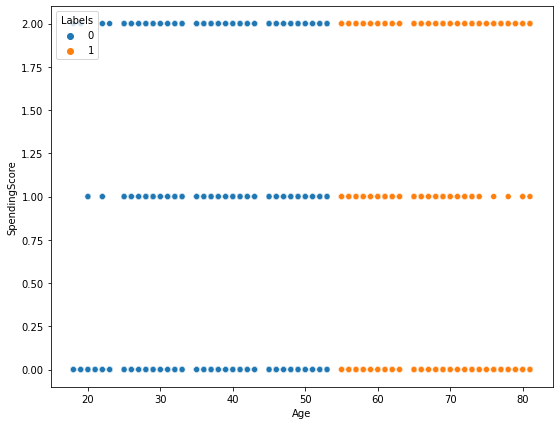

In [92]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=X_numerics,x='Age',y='SpendingScore',hue='Labels')
plt.show()

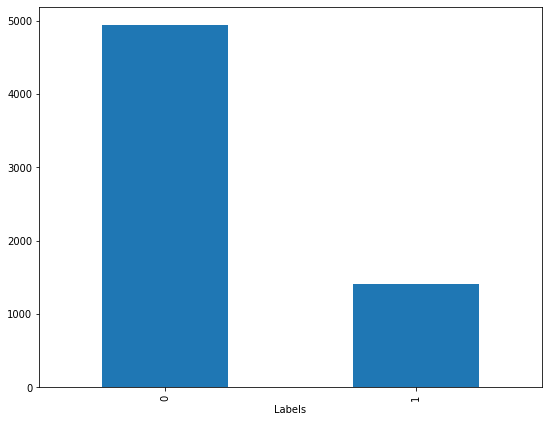

In [93]:
X_numerics['Labels'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

In [94]:
pca_df['cluster_agg']=agglom.labels_

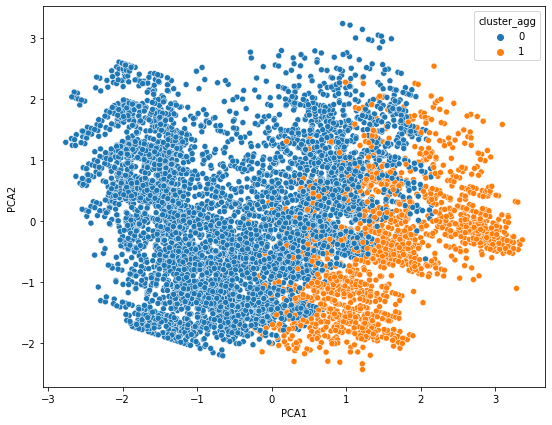

In [95]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='cluster_agg')
plt.show()

In [96]:
X_numerics.drop(columns='Labels',axis=1,inplace=True)

In [97]:
dist=distance_matrix(X_numerics,X_numerics)
print(dist)

[[ 0.         45.         45.04442252 ... 20.         13.
  21.        ]
 [45.          0.          2.         ... 25.         32.
  24.        ]
 [45.04442252  2.          0.         ... 25.07987241 32.06243908
  24.08318916]
 ...
 [20.         25.         25.07987241 ...  0.          7.
   1.        ]
 [13.         32.         32.06243908 ...  7.          0.
   8.        ]
 [21.         24.         24.08318916 ...  1.          8.
   0.        ]]
